In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
from figures import JobTimePlots

In [3]:
%load_ext autoreload
%autoreload 2

# Read Simulation Time Data

In [4]:
sim_out_data = pandas.read_csv("/home/kenenbek/github-cloned/TRACE_AND_OUT/out.txt")
sim_out_data.columns = [i.replace(" ", "") for i in sim_out_data.columns]
sim_out_data.head()

JobName  Success  Timestart  timeschedule  TimestartExec  TimeEndExec  \
0  159050359        1        304   1000.011281    1000.011292  1421.381292   
1  159050361        1        304   1000.011281    1000.011292  1706.291292   
2  159050357        1        303   1000.011064    1000.011271  2196.541271   
3  159050999        1       3533   4000.011902    4000.011913  4026.211913   
4  159051000        1       3534   4000.011902    4000.011913  4043.931913   

            Tier   Type  
0    LCG.CNAF.it  Merge  
1    LCG.CNAF.it  Merge  
2  LCG.CERN.cern  Merge  
3    LCG.CNAF.it  Merge  
4    LCG.CNAF.it  Merge

# Read Real Time Data

In [5]:
real_out_data = pandas.read_csv('/home/kenenbek/github-cloned/TRACE_AND_OUT/real_out.txt')
is_not_none = (real_out_data.values != 'None').cumprod(axis=1)[:, -1]
real_out_data = real_out_data.iloc[is_not_none == 1]
real_out_data.head()

JobName  SubmissionTime  StartExecTime  EndExecTime  WallClockTime  \
0  159050186               0          78443       132816   54360.443574   
1  159050187               0          80306       220422  140101.891558   
2  159050188               1          80203       218076  137858.896384   
3  159050189              14          22896        33098   10191.768692   
4  159050190              16          22464        33307  10832.1707449   

  TotalCPUTime           JobType           Tier  
0     53838.47     DataStripping  LCG.CERN.cern  
1    138818.55     DataStripping  LCG.CERN.cern  
2    137710.95     DataStripping  LCG.CERN.cern  
3     10104.56  MCReconstruction    LCG.SARA.nl  
4     10473.75  MCReconstruction  LCG.NIKHEF.nl

# Job Time Plots

In [6]:
jtp = JobTimePlots(sim_out_data, real_out_data)

### Job Submission Time Plot

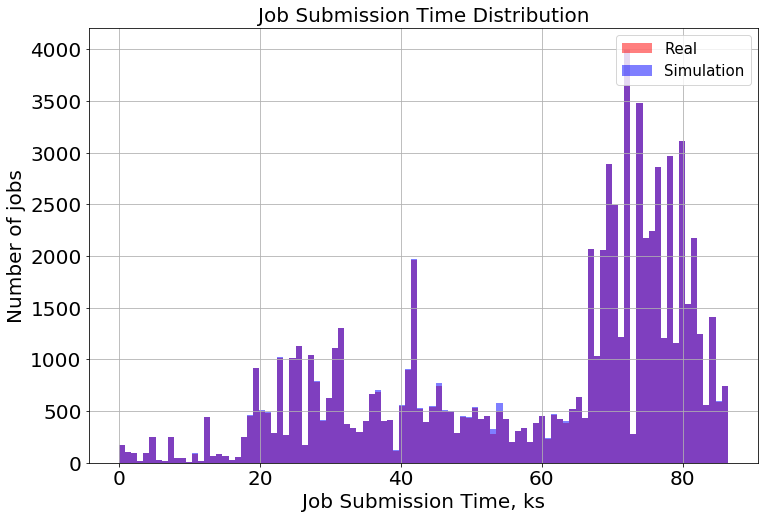

In [7]:
jtp.job_submission_time()

figures.py:50: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if sim_object_names == None or real_object_names == None:


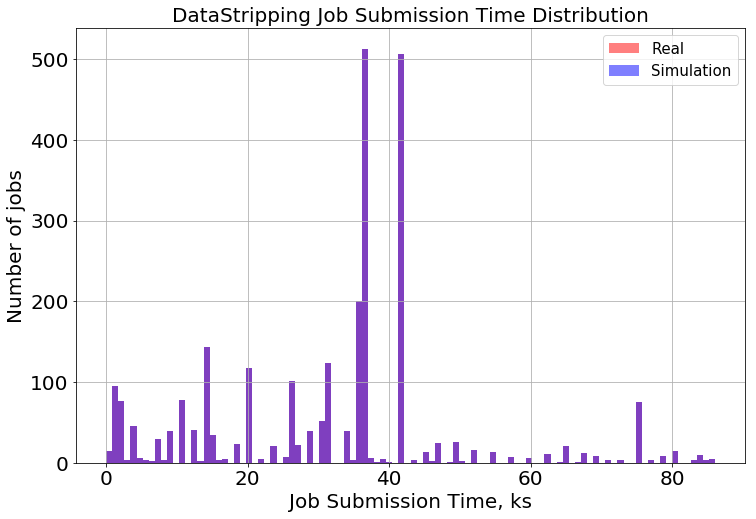

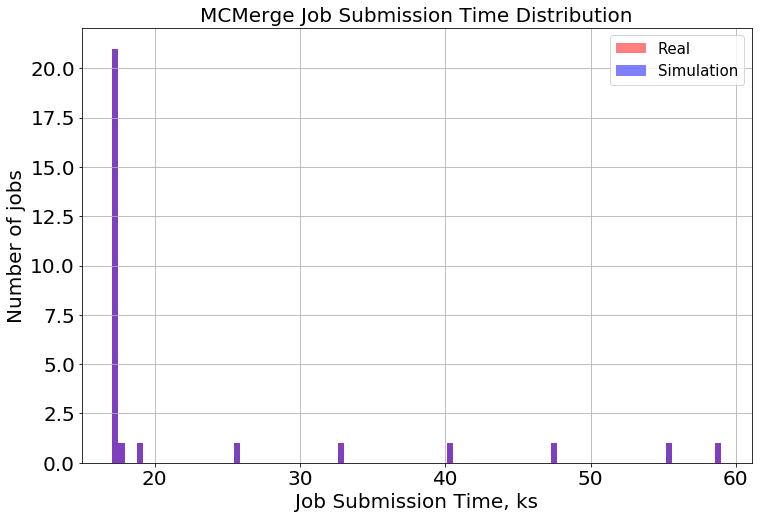

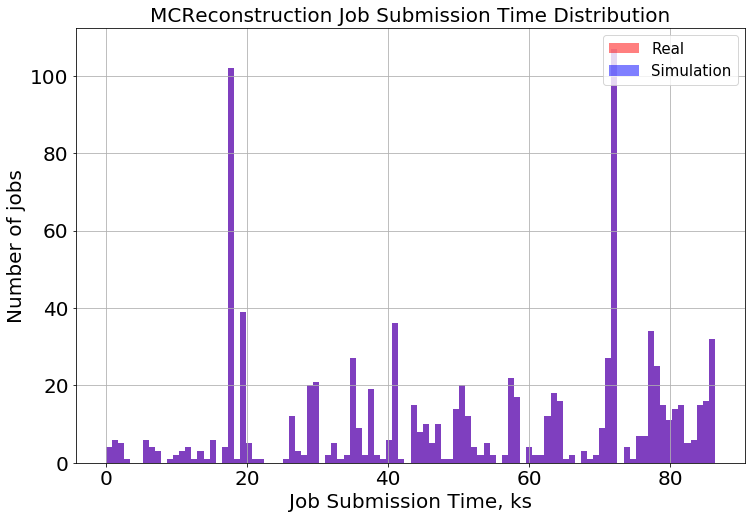

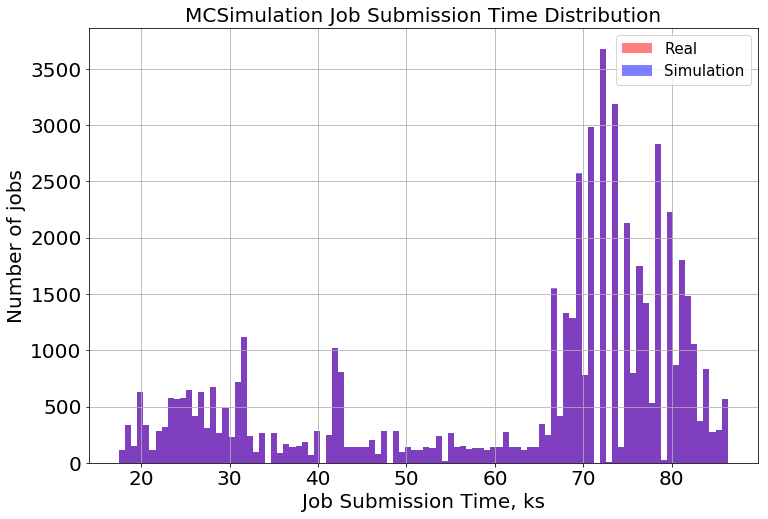

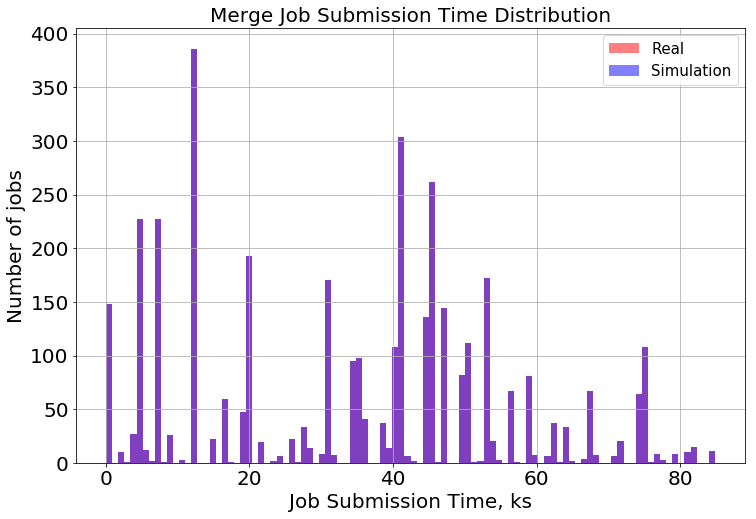

ValueError: zero-size array to reduction operation minimum which has no identity

In [8]:
jtp.job_submission_time(by_job_type=True)

### Job Start Execution Time Plot

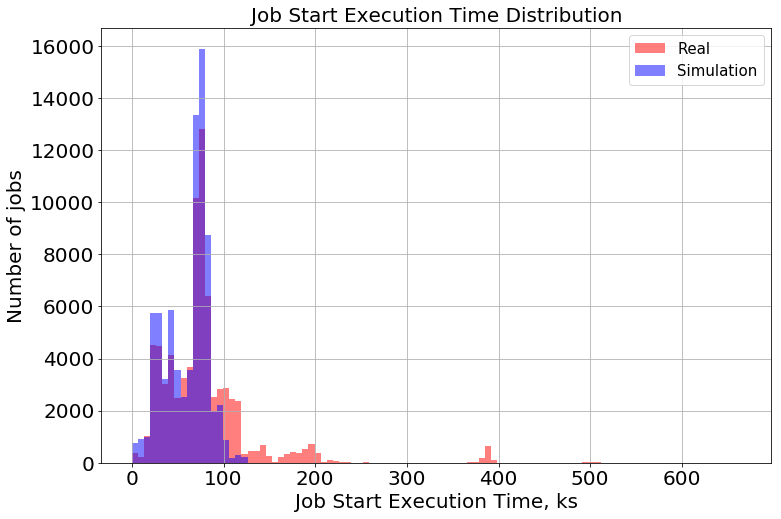

In [10]:
jtp.job_start_exec_time()

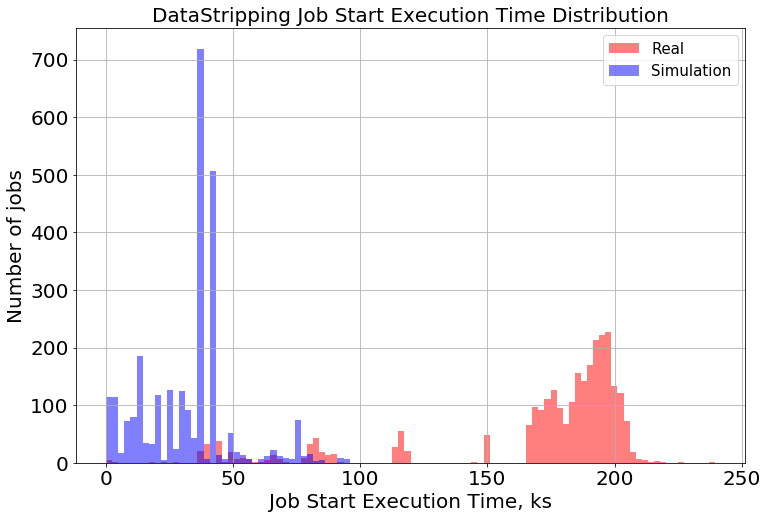

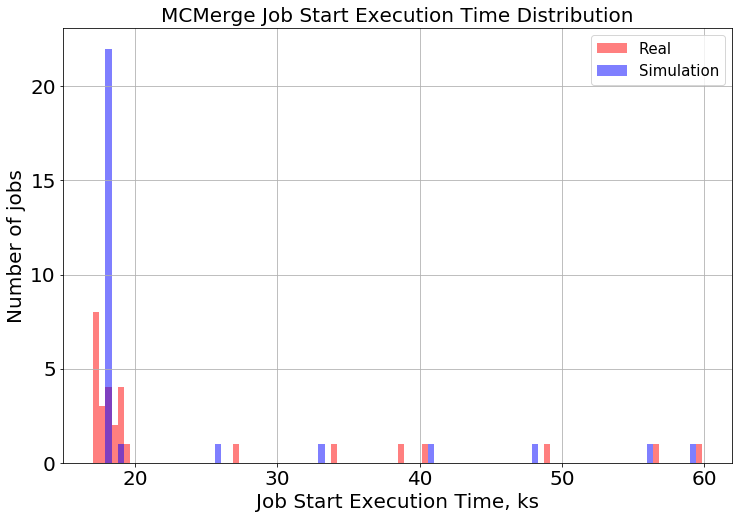

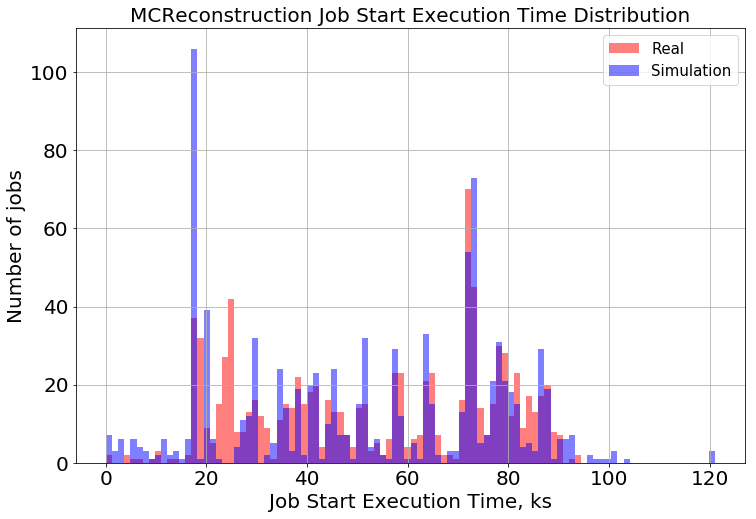

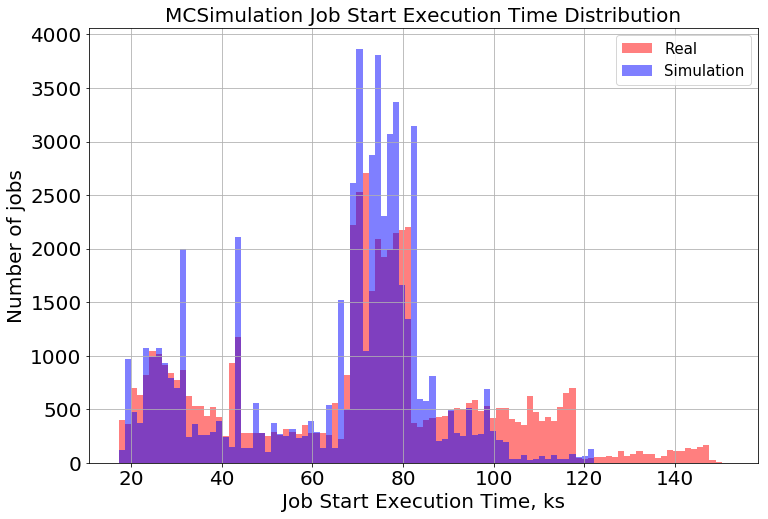

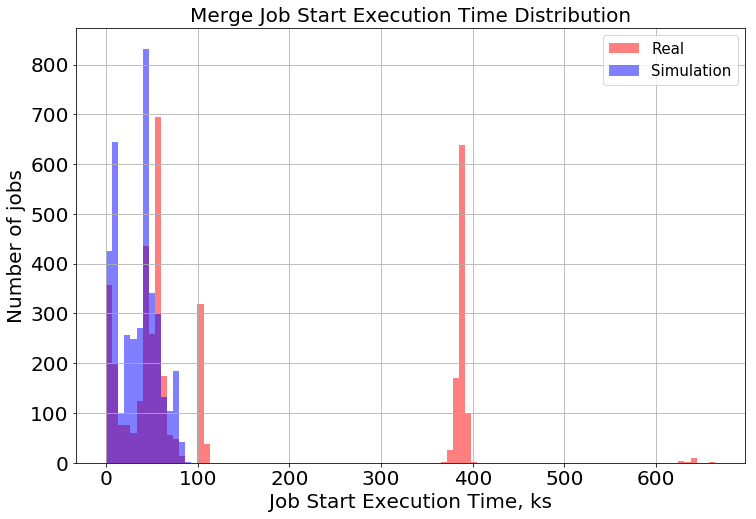

ValueError: zero-size array to reduction operation minimum which has no identity

In [11]:
jtp.job_start_exec_time(by_job_type=True)

### Job End Execution Time Plot

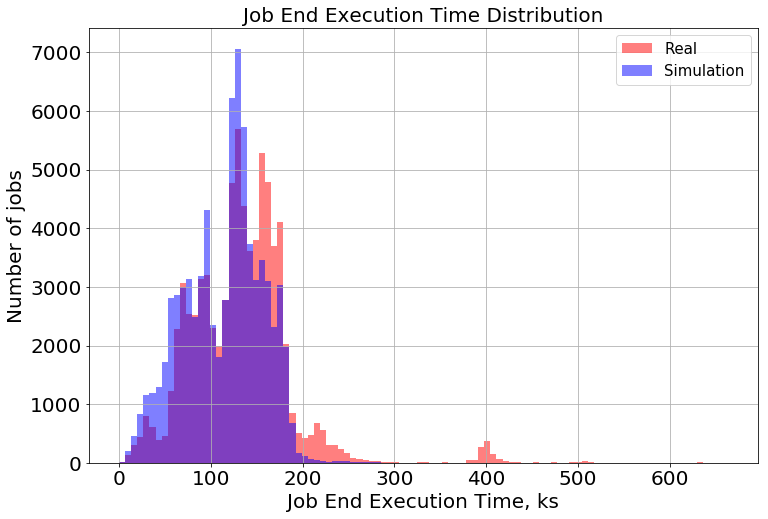

In [12]:
jtp.job_end_exec_time()

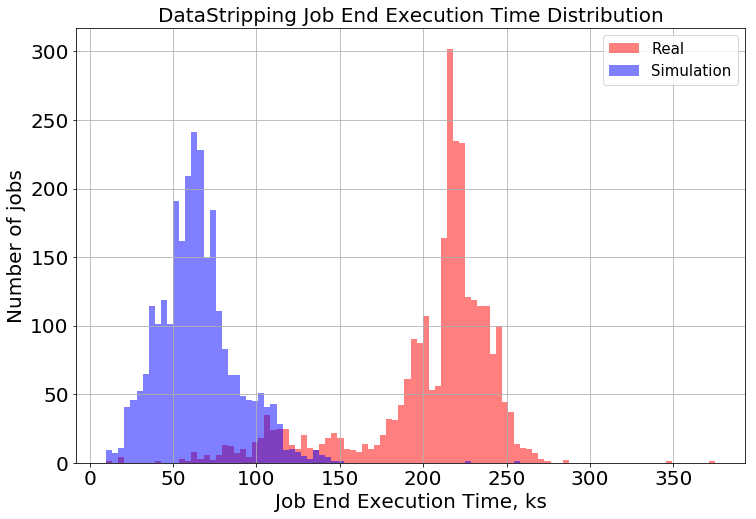

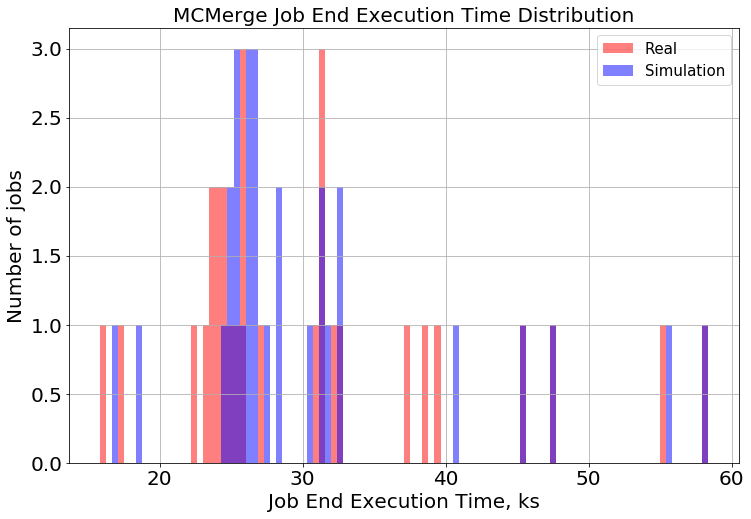

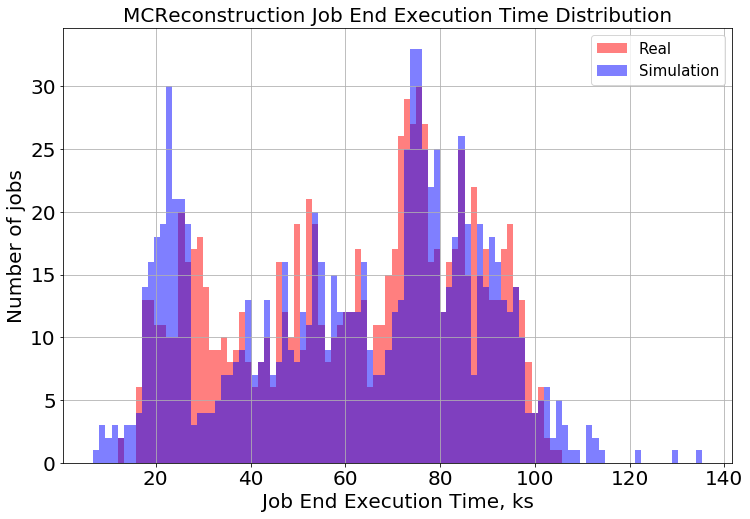

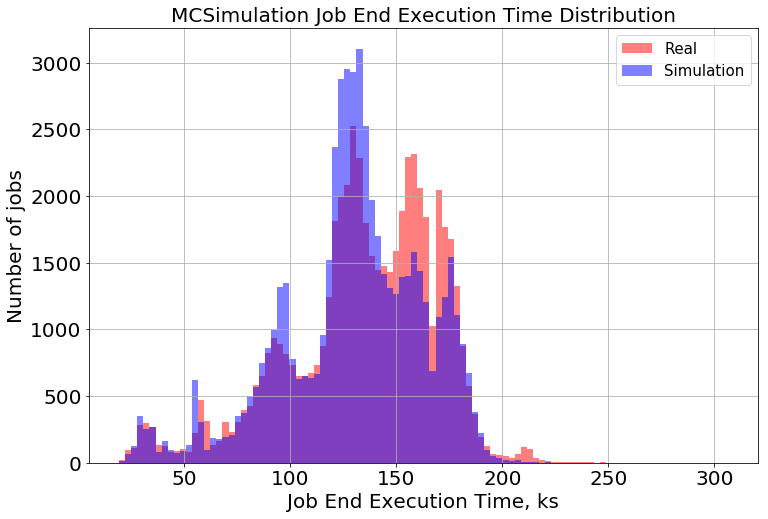

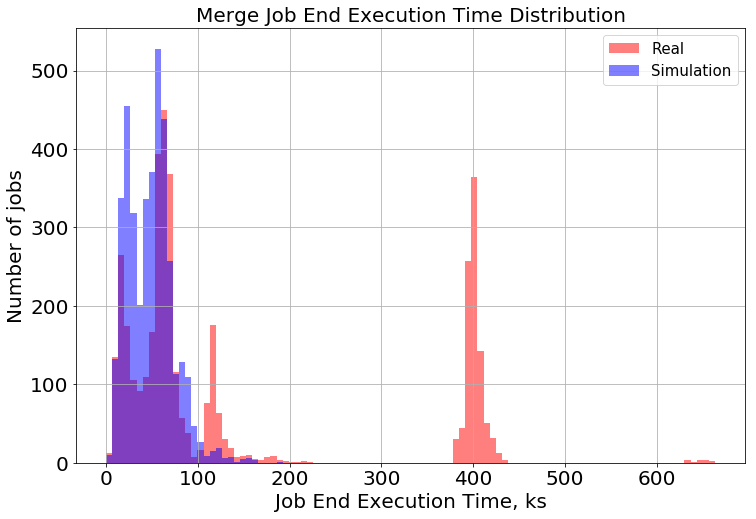

ValueError: zero-size array to reduction operation minimum which has no identity

In [13]:
jtp.job_end_exec_time(by_job_type=True)

### Job CPU Time Plot

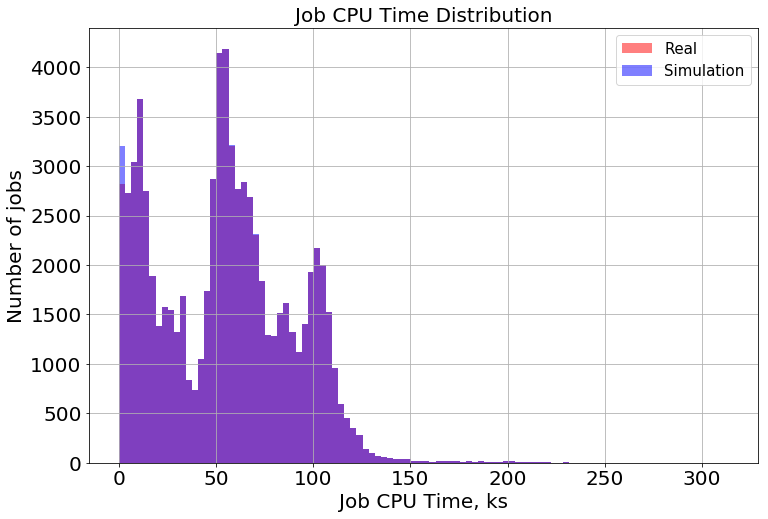

In [14]:
jtp.job_cpu_time()

### Job Execution Time Plots
Job execution time = job end execution time - job start execution time

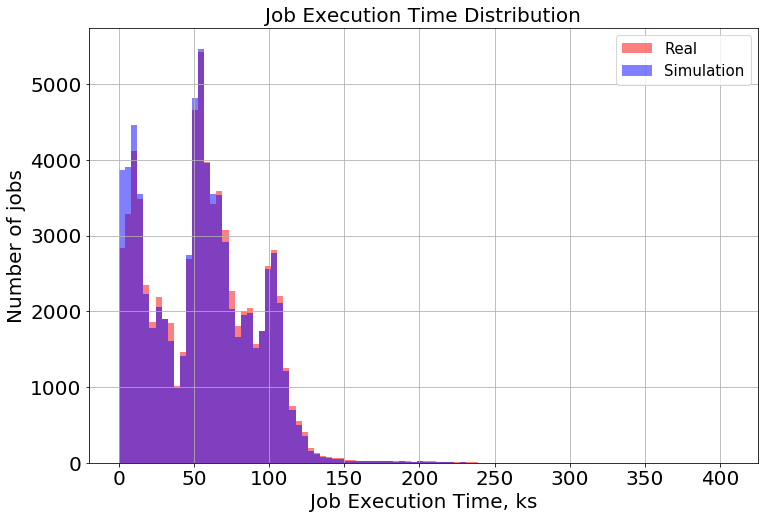

In [15]:
jtp.job_exec_time()

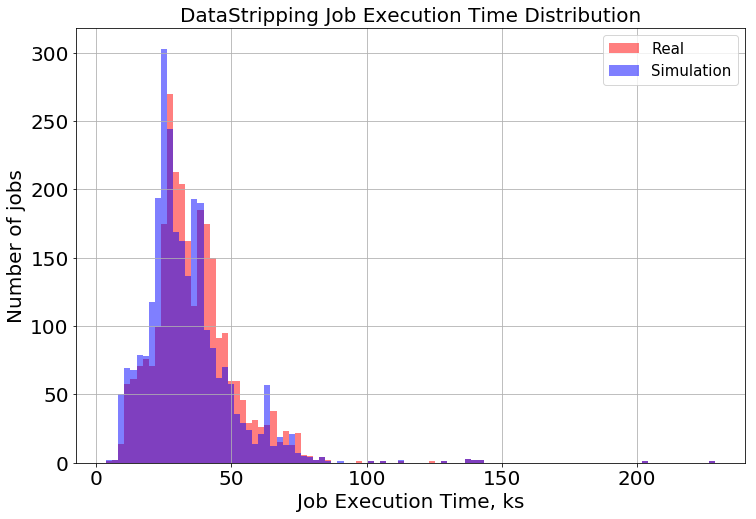

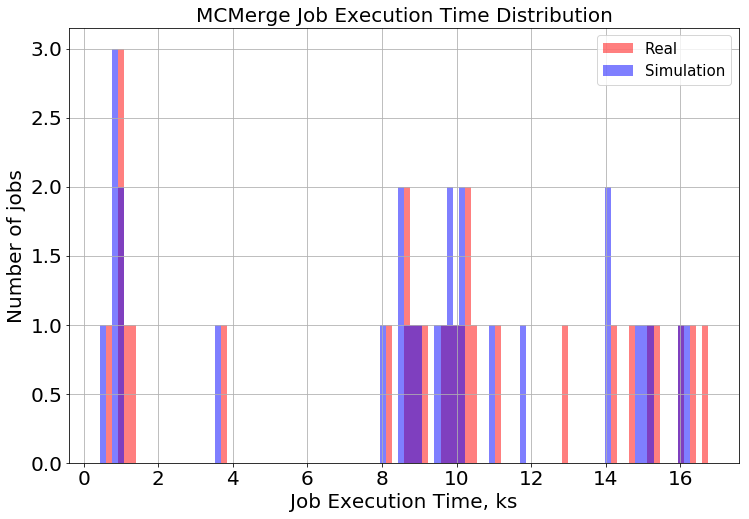

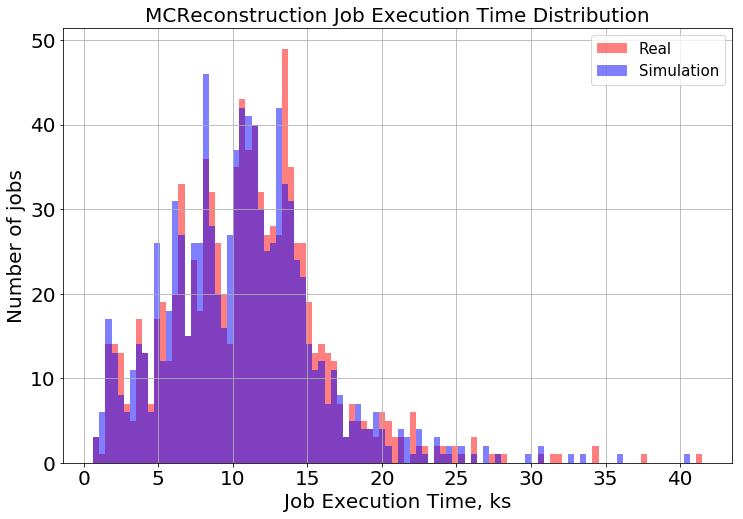

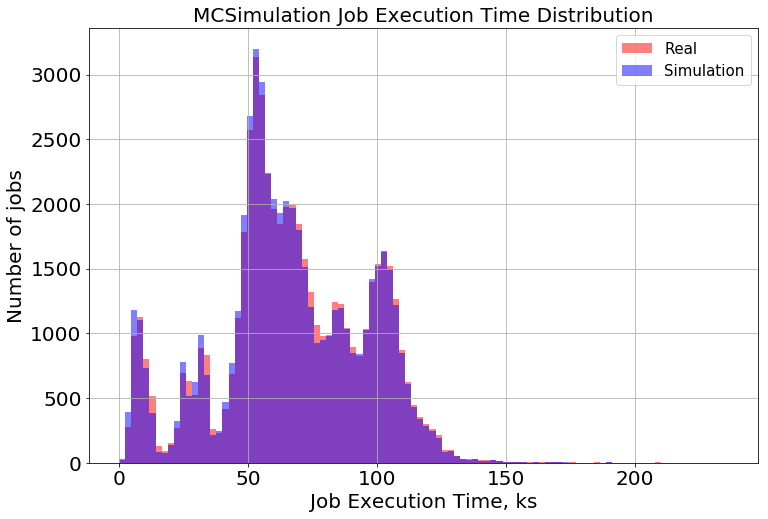

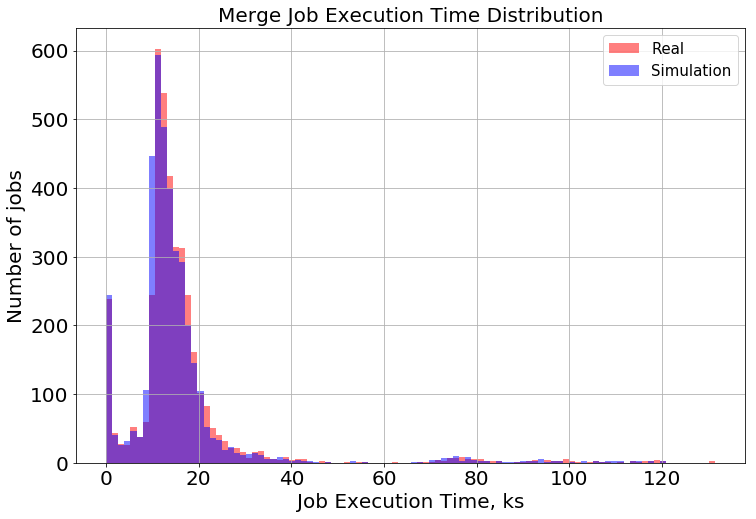

ValueError: zero-size array to reduction operation minimum which has no identity

In [16]:
jtp.job_exec_time(by_job_type=True)

### Job Wait Time Plots
Job wait time = job start execution time - job submission time

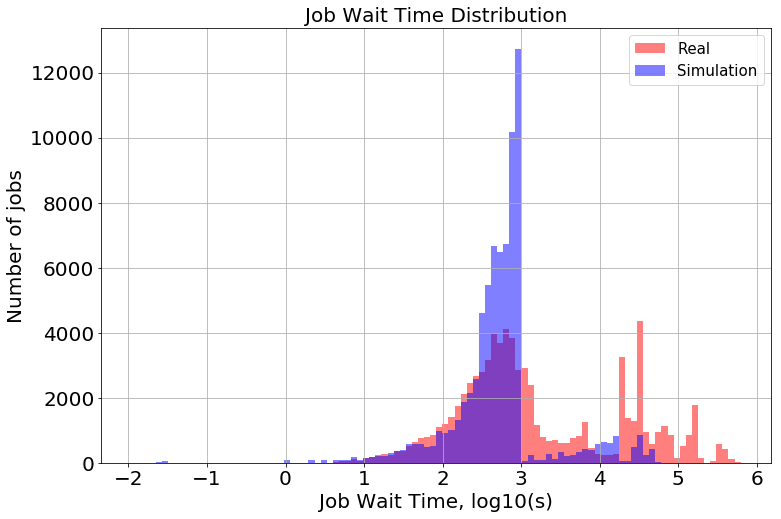

In [17]:
jtp.job_wait_time()

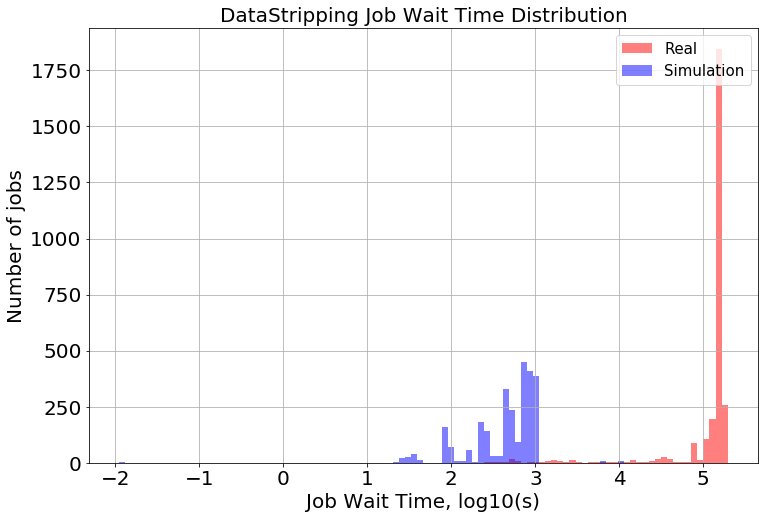

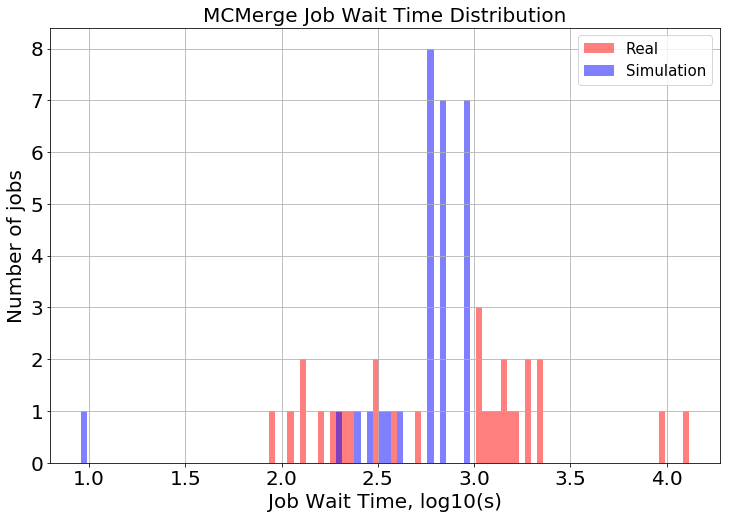

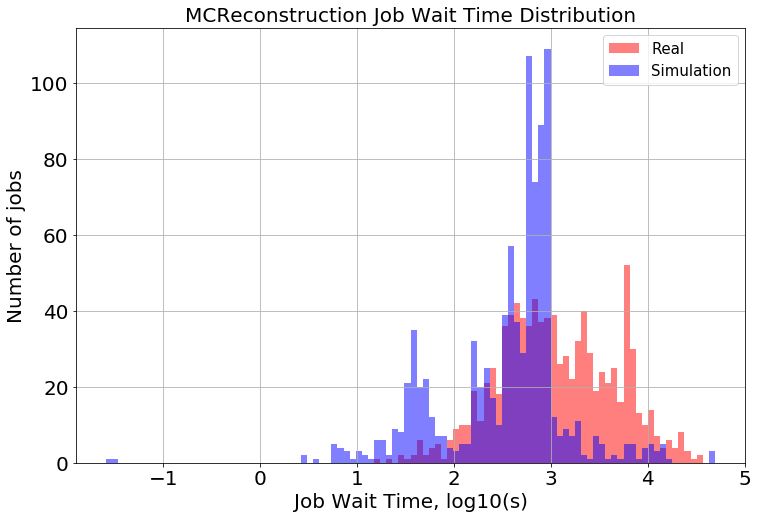

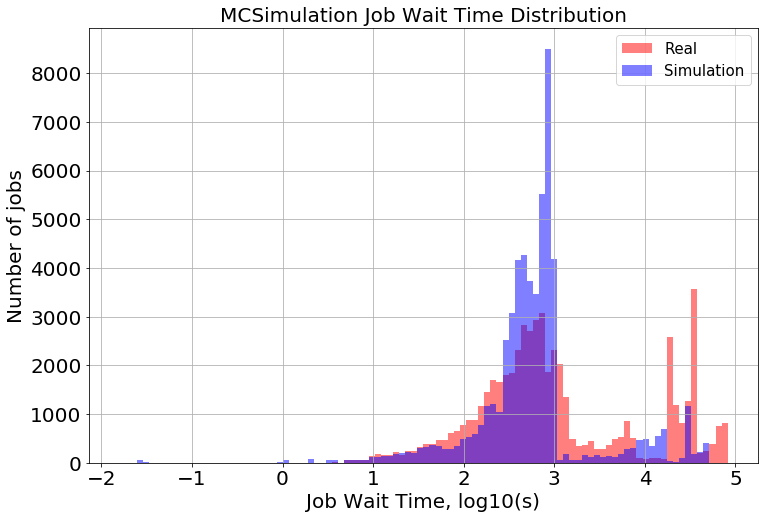

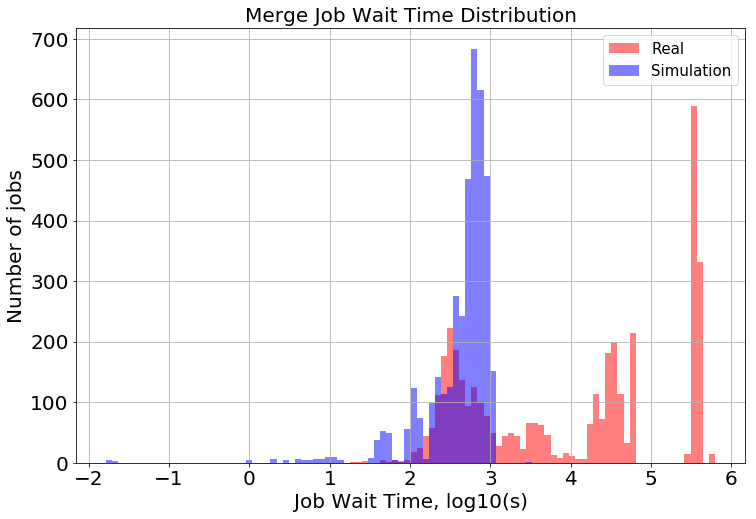

ValueError: zero-size array to reduction operation minimum which has no identity

In [18]:
jtp.job_wait_time(by_job_type=True)

### Job Life Time Plots
Job life time = job end execution time - job submission time

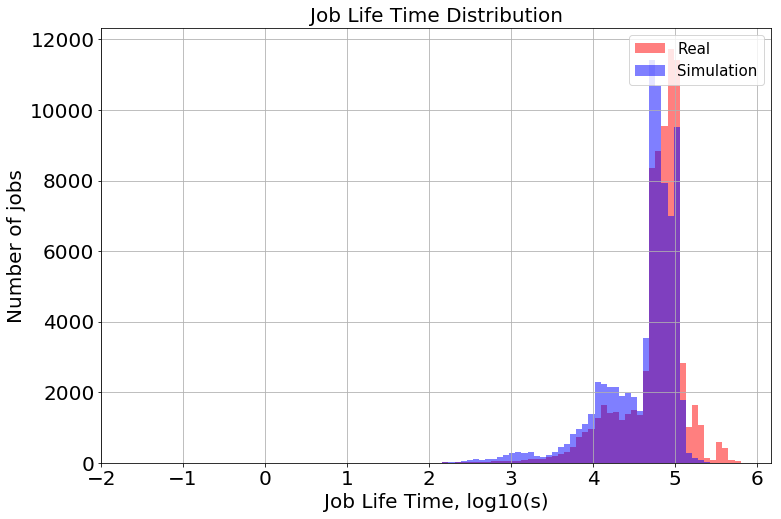

In [19]:
jtp.job_life_time()

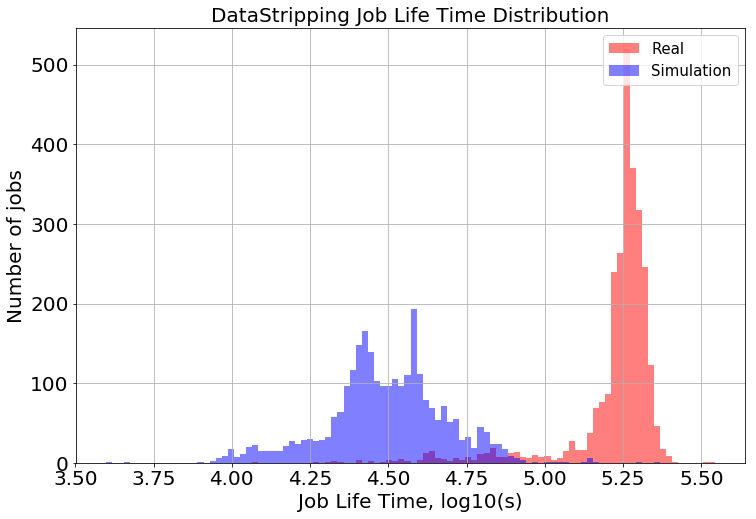

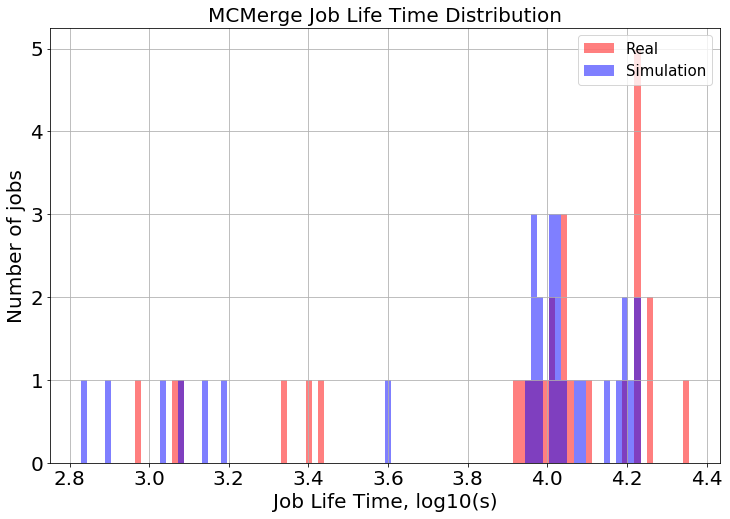

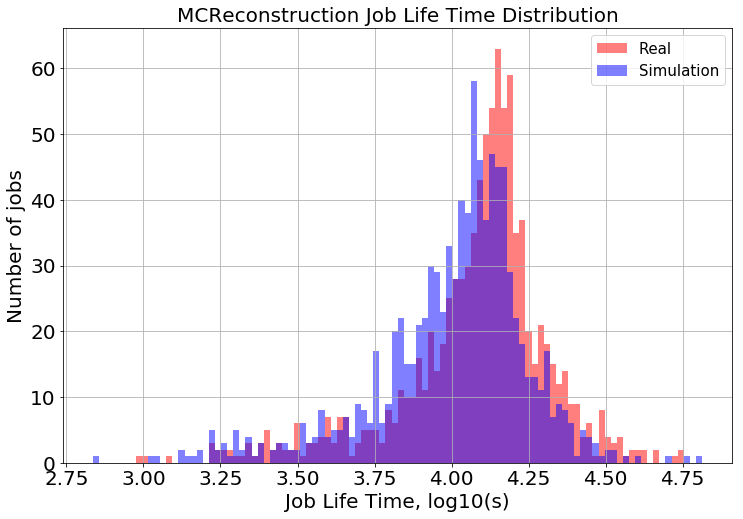

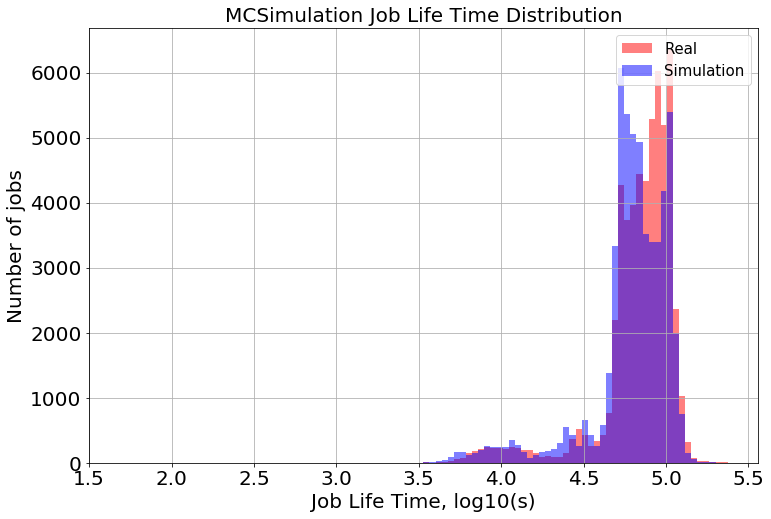

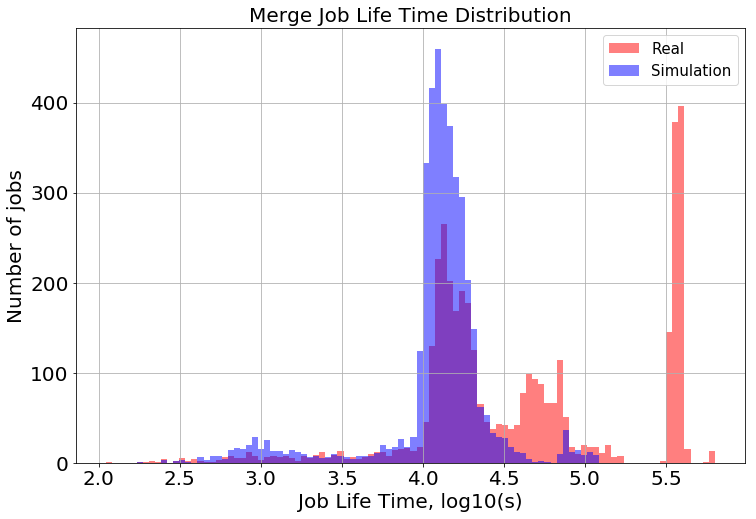

ValueError: zero-size array to reduction operation minimum which has no identity

In [20]:
jtp.job_life_time(by_job_type=True)

# Read Simulation Trace Data

In [22]:
sim_trace_data = pandas.read_csv("/home/kenenbek/github-cloned/TRACE_AND_OUT/trace.csv", header=None, sep=', ')
sim_trace_data.columns = ['Nothing', 'Object', 'Variable', 'StartObservTime', 'EndObservTime', 'ObservTime', 'VarValue']
sim_trace_data.head(5)

/home/kenenbek/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Nothing            Object            Variable  StartObservTime  \
0  Variable  Tier2_5-Tier2_59             traffic              0.0   
1  Variable  Tier2_5-Tier2_59    directUserAmount              0.0   
2  Variable  Tier2_5-Tier2_59  indirectUserAmount              0.0   
3  Variable  Tier2_5-Tier2_59           bandwidth              0.0   
4  Variable  Tier2_5-Tier2_59             latency              0.0   

   EndObservTime     ObservTime      VarValue  
0  329301.464527  329301.464527  0.000000e+00  
1  329301.464527  329301.464527  0.000000e+00  
2  329301.464527  329301.464527  0.000000e+00  
3  329301.464527  329301.464527  1.000000e+09  
4  329301.464527  329301.464527  0.000000e+00

# Traffic Plots

In [23]:
from figures import TrafficPlots
tp = TrafficPlots(sim_trace_data)

### LHCOPN Data Transfer Plots

figures.py:473: FutureWarning: icol(i) is deprecated. Please use .iloc[:,i]
  time_max = self.sim_trace_data.icol(4).values.max()


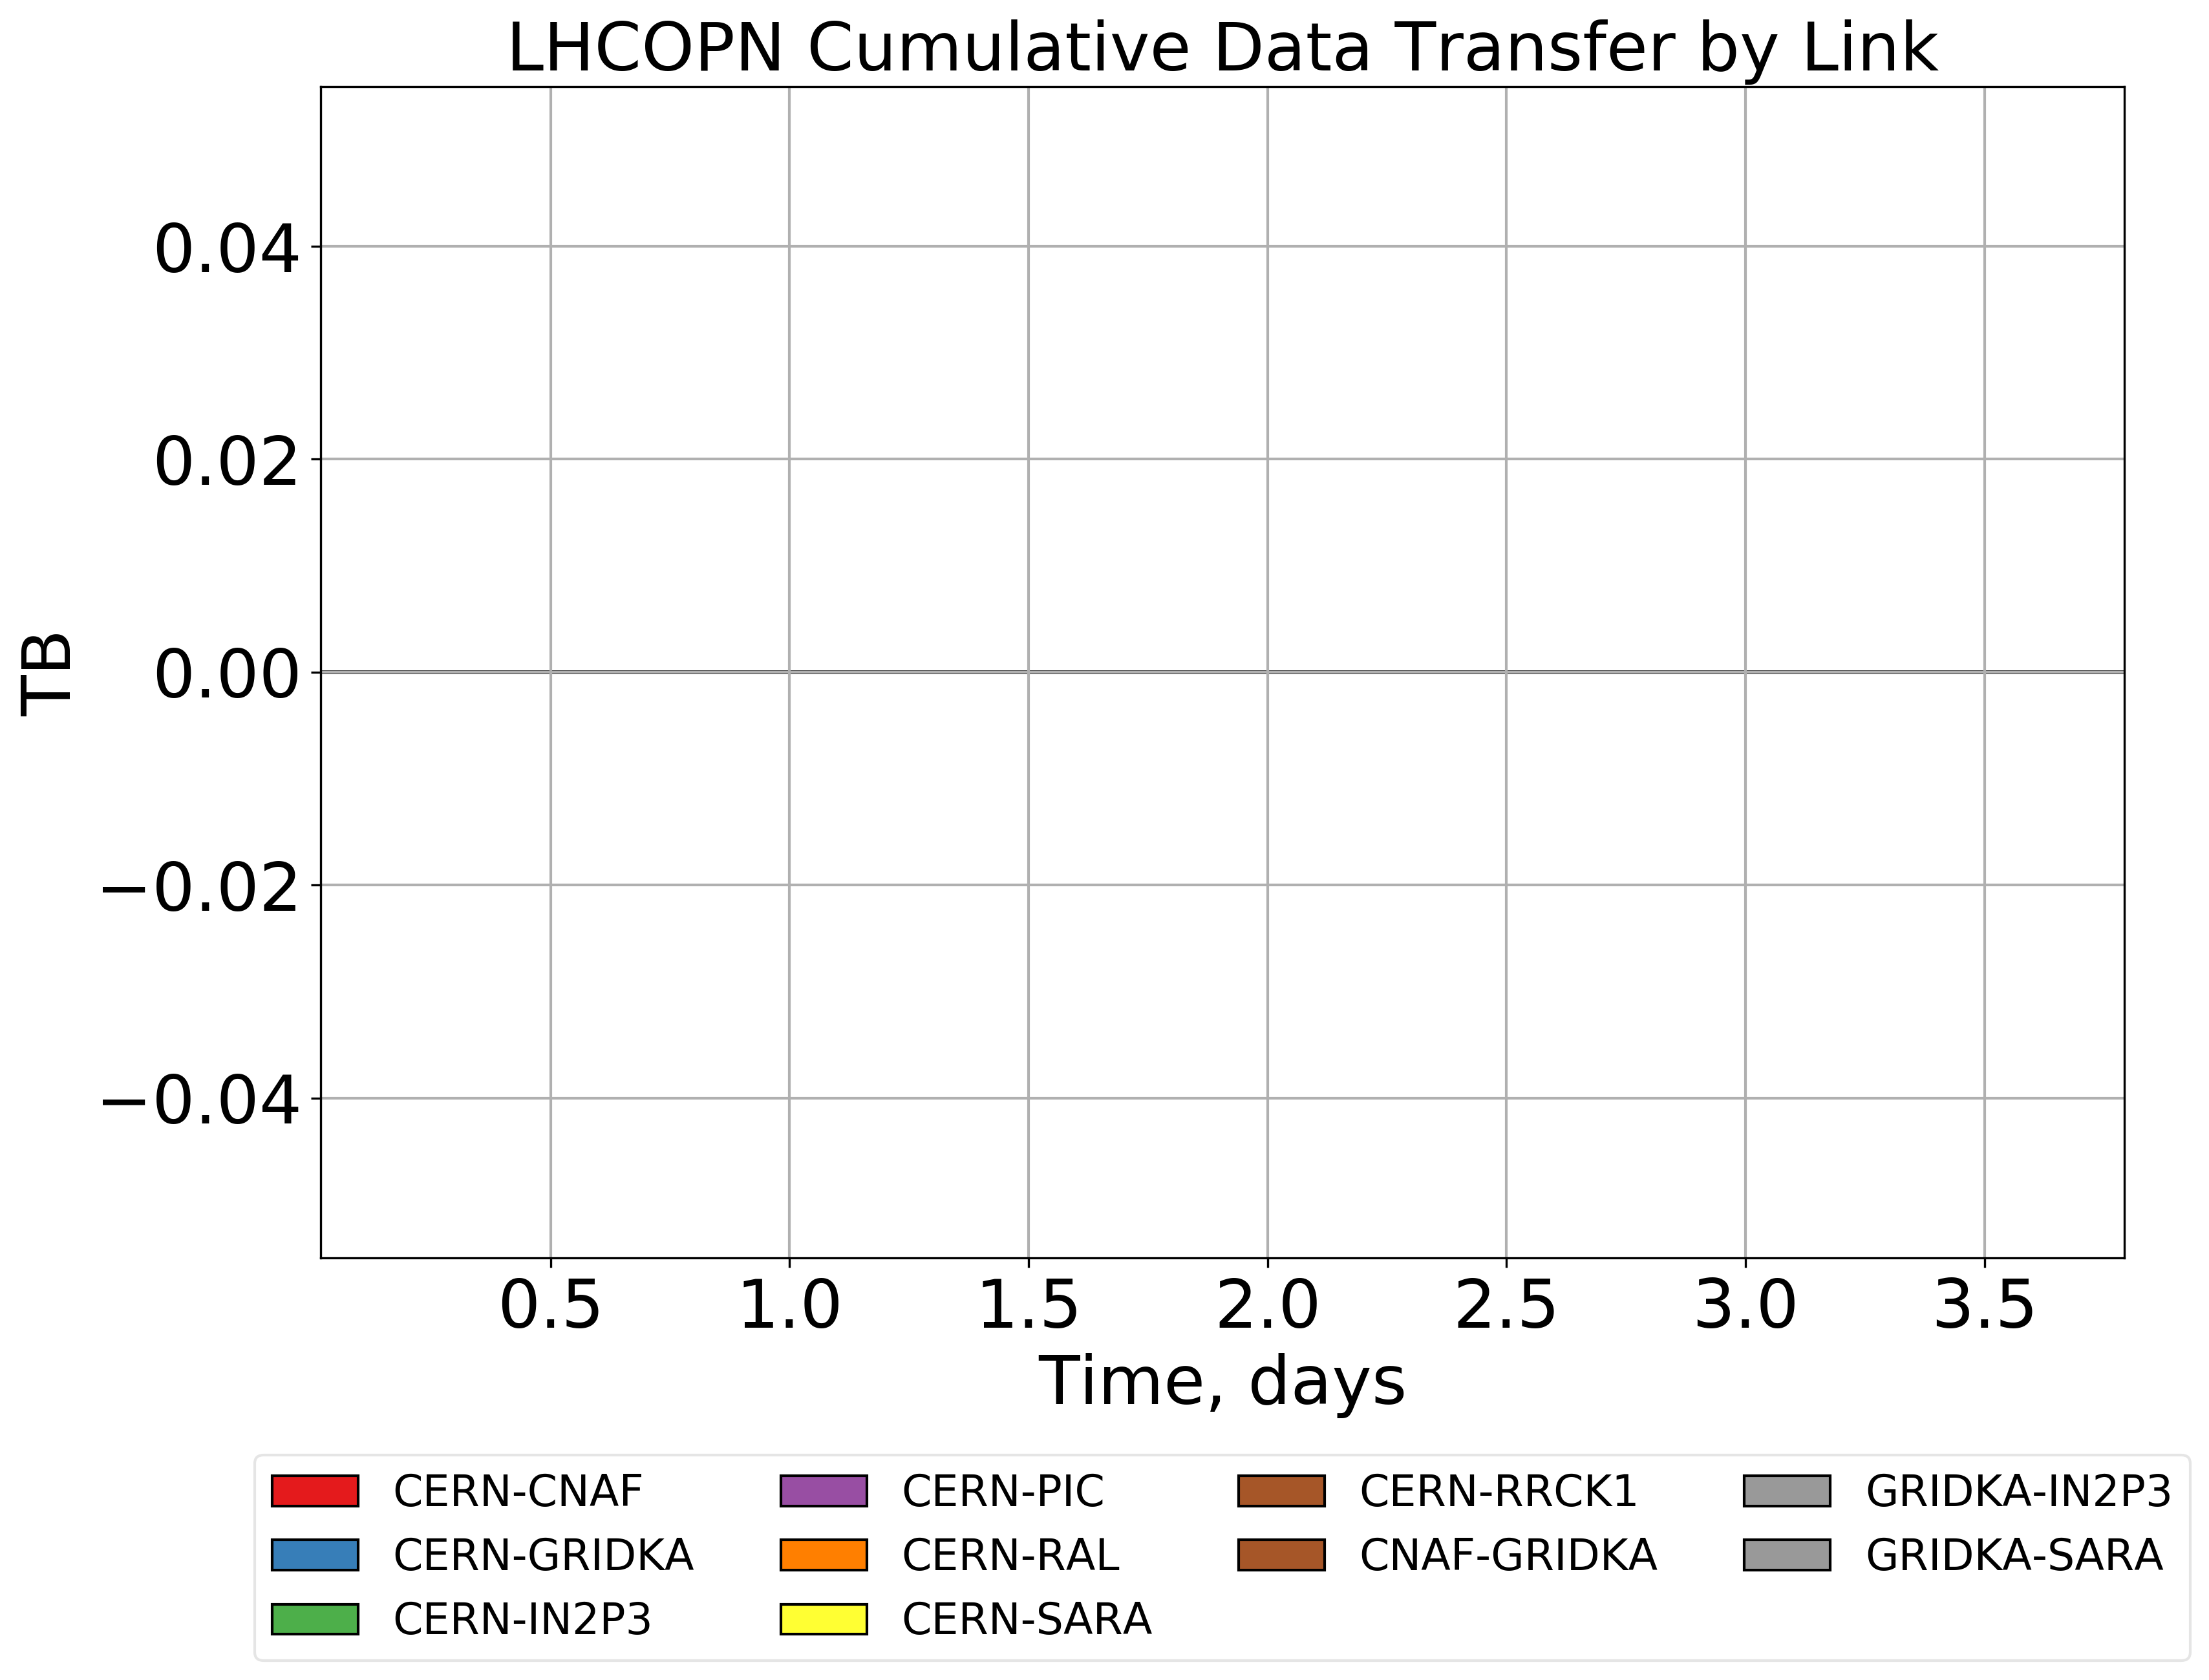

In [24]:
tp.lhcopn_cumulative_data_transfer()

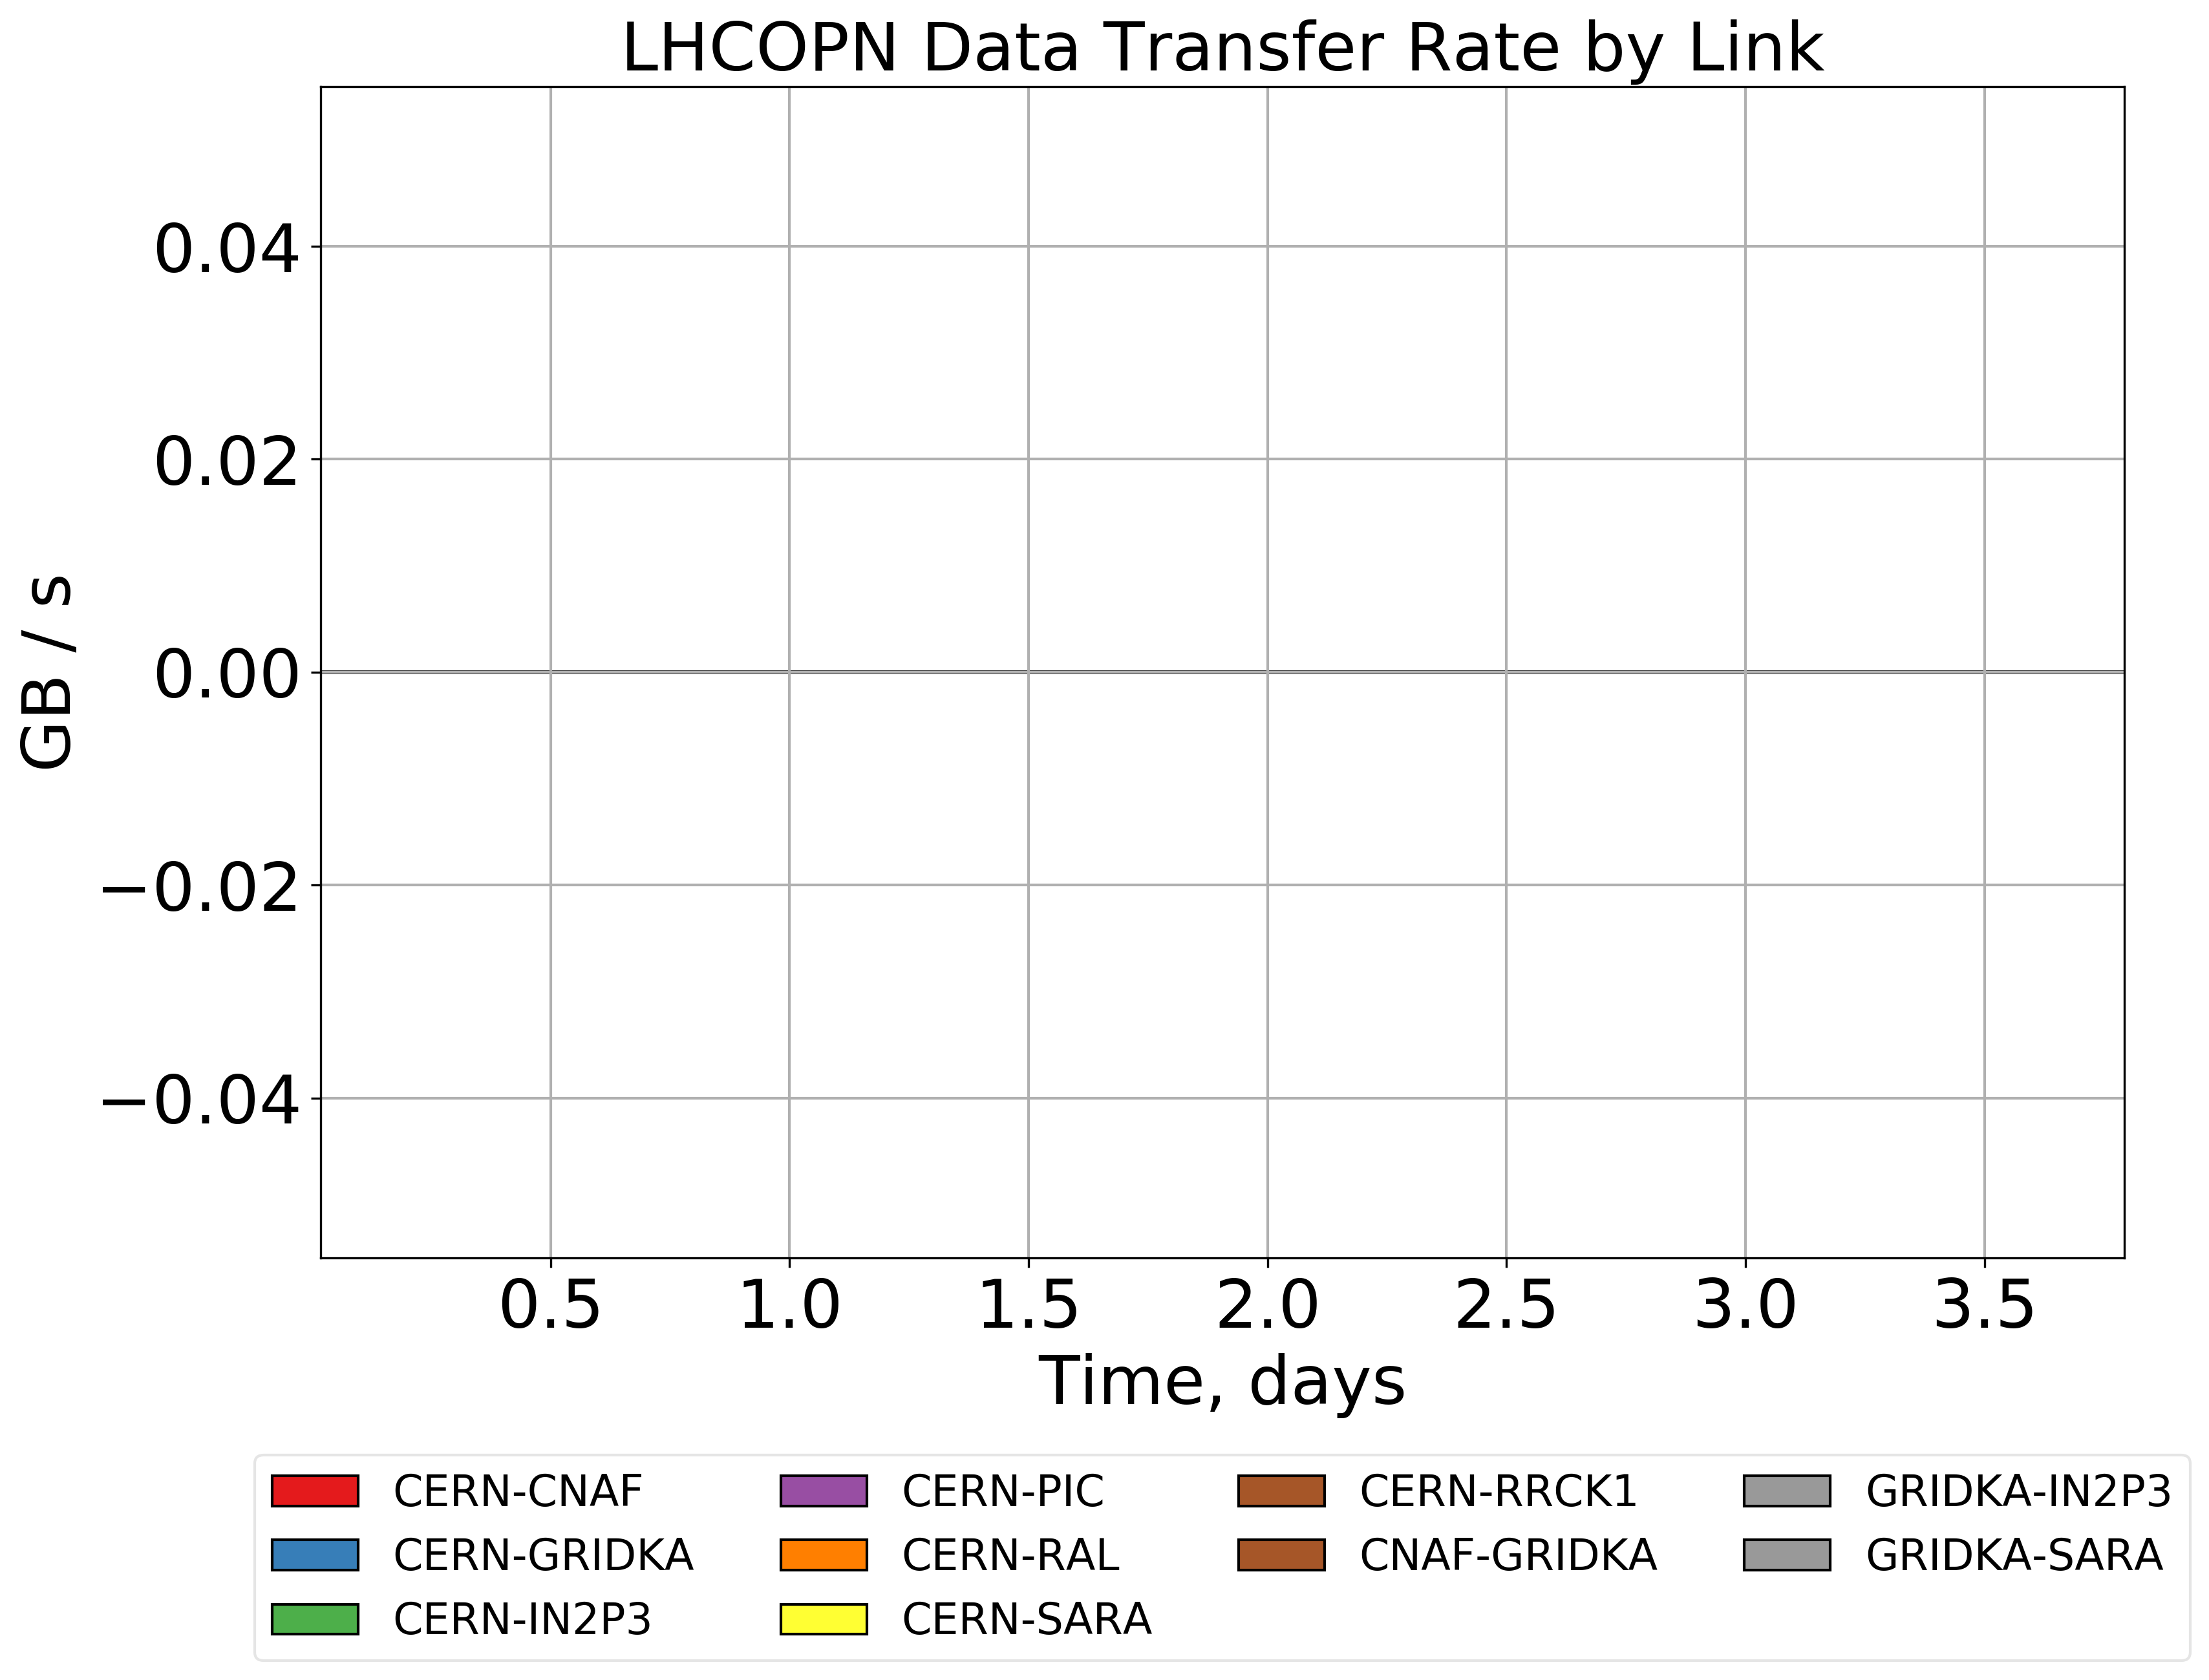

In [25]:
tp.lhcopn_data_transfer_rate()

# Input/Output Data Transfer Plots

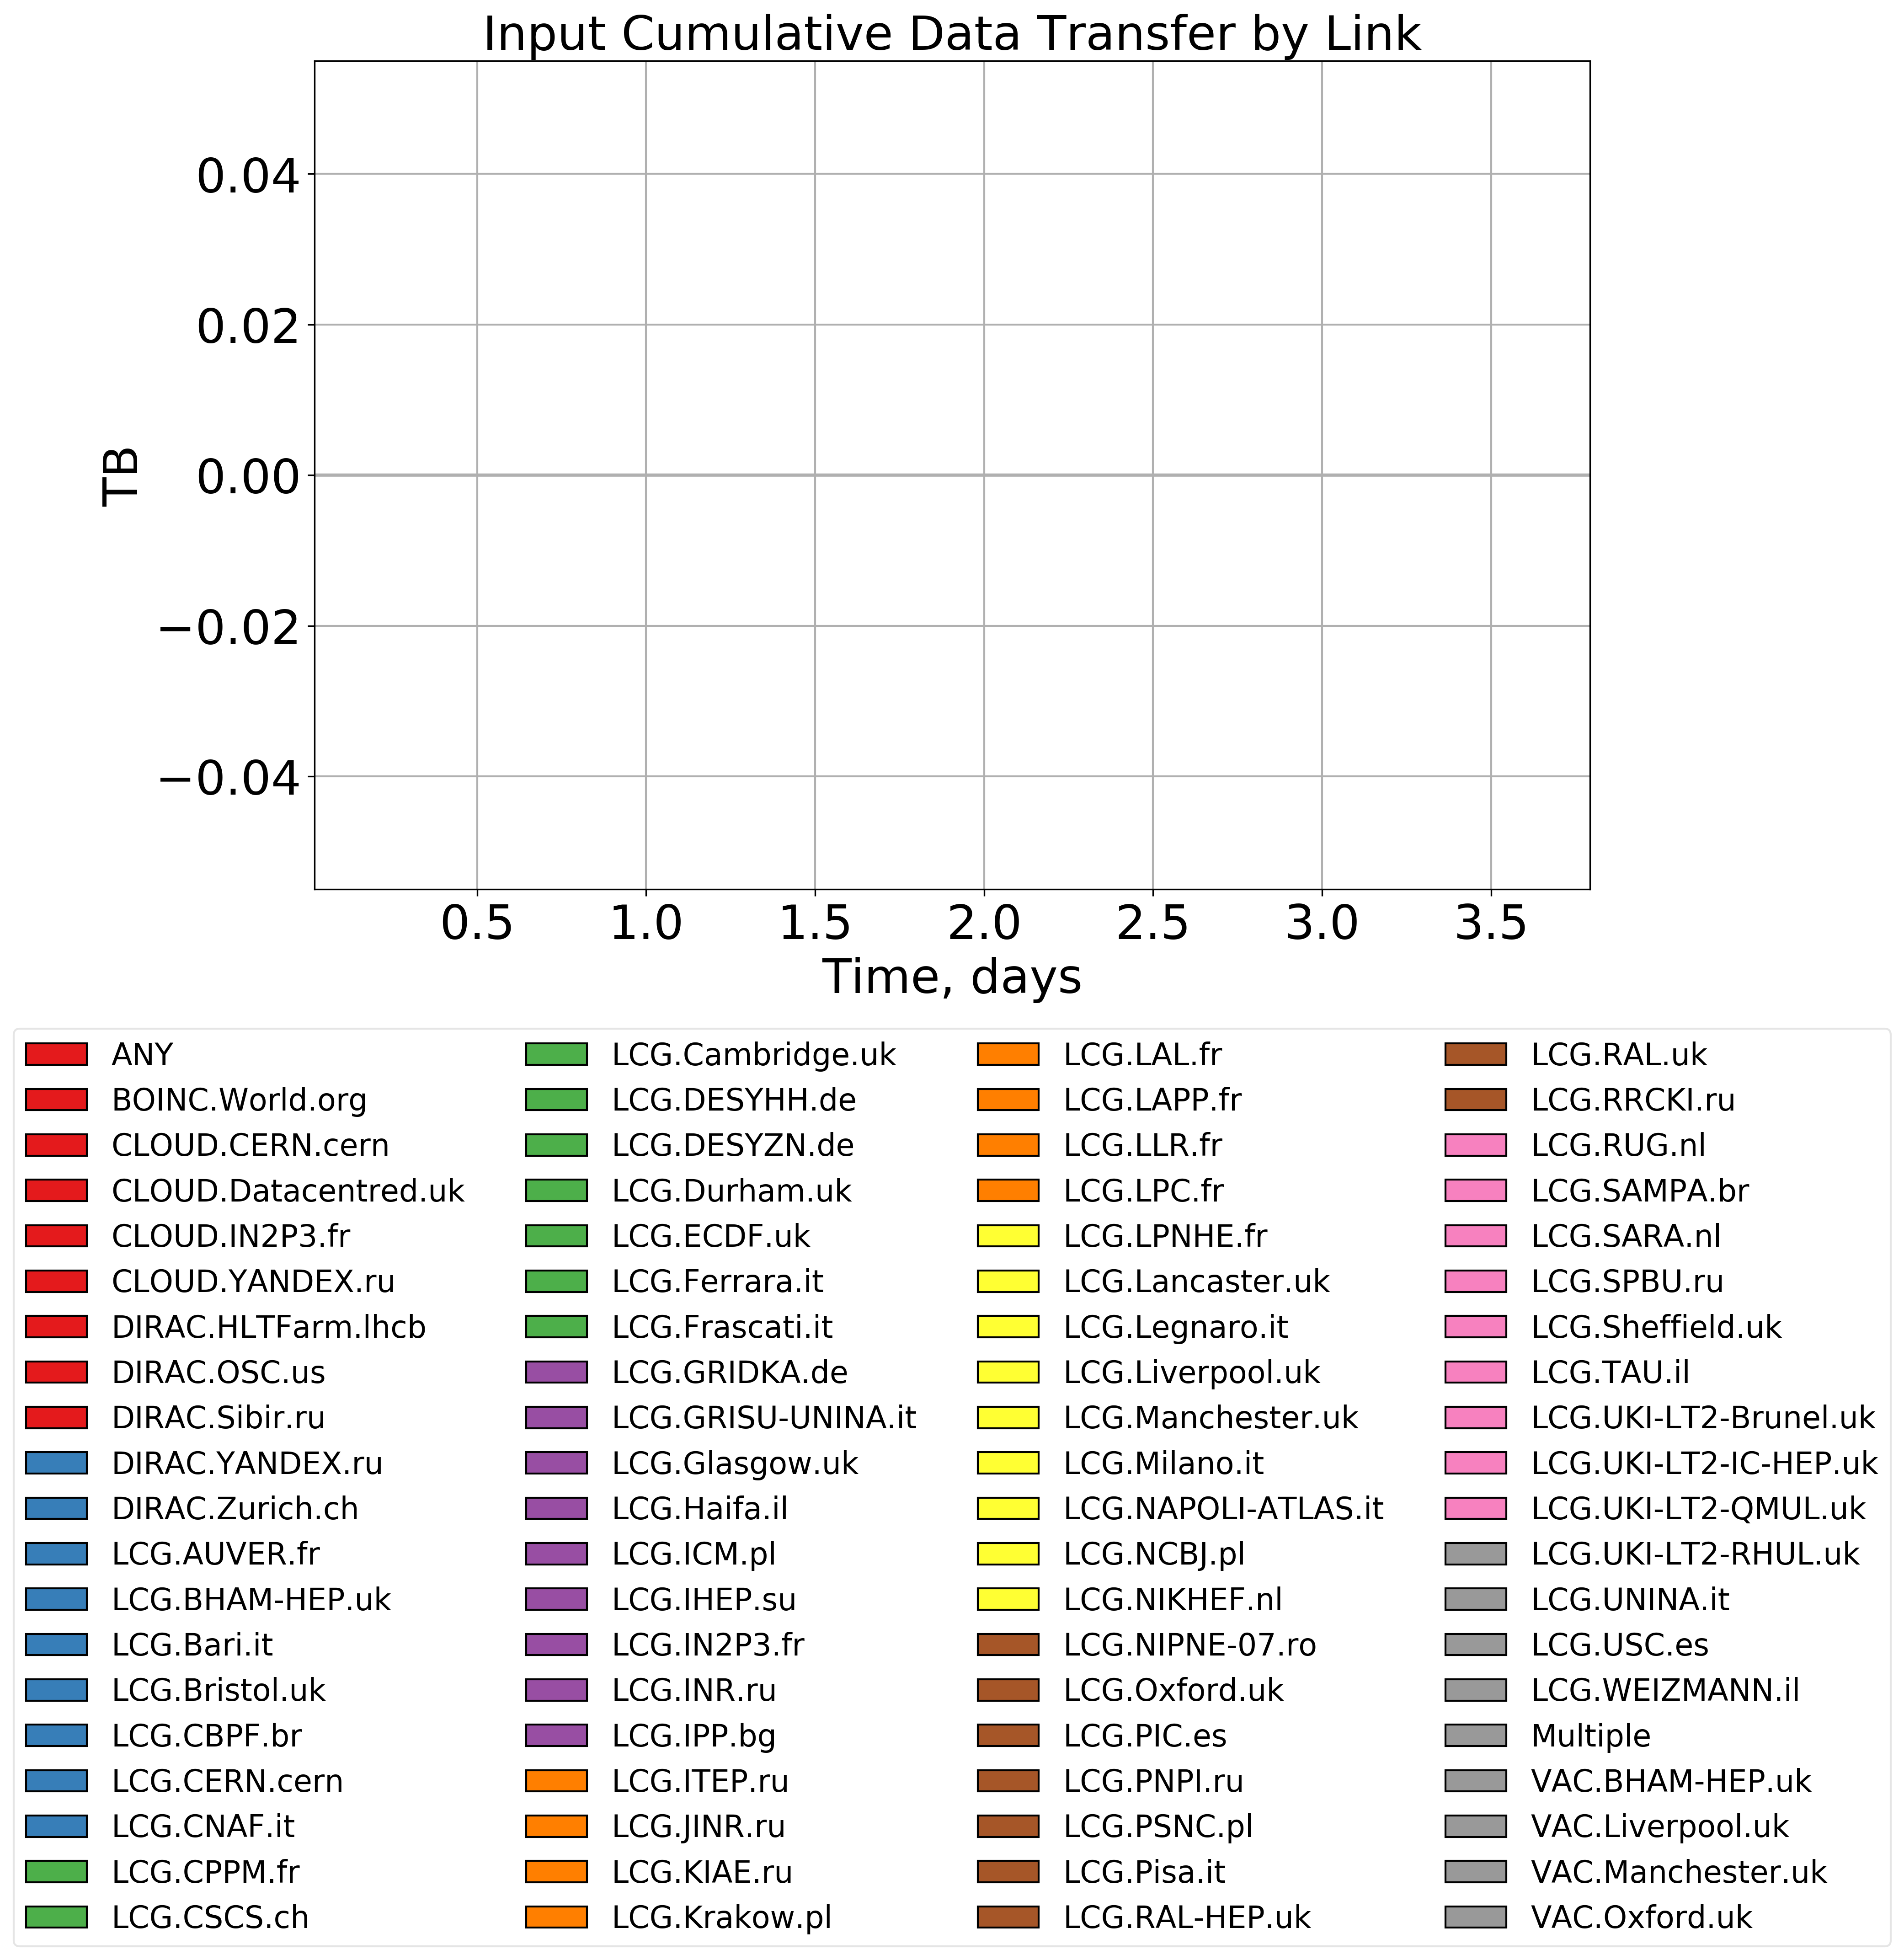

In [26]:
tp.input_cumulative_data_transfer()

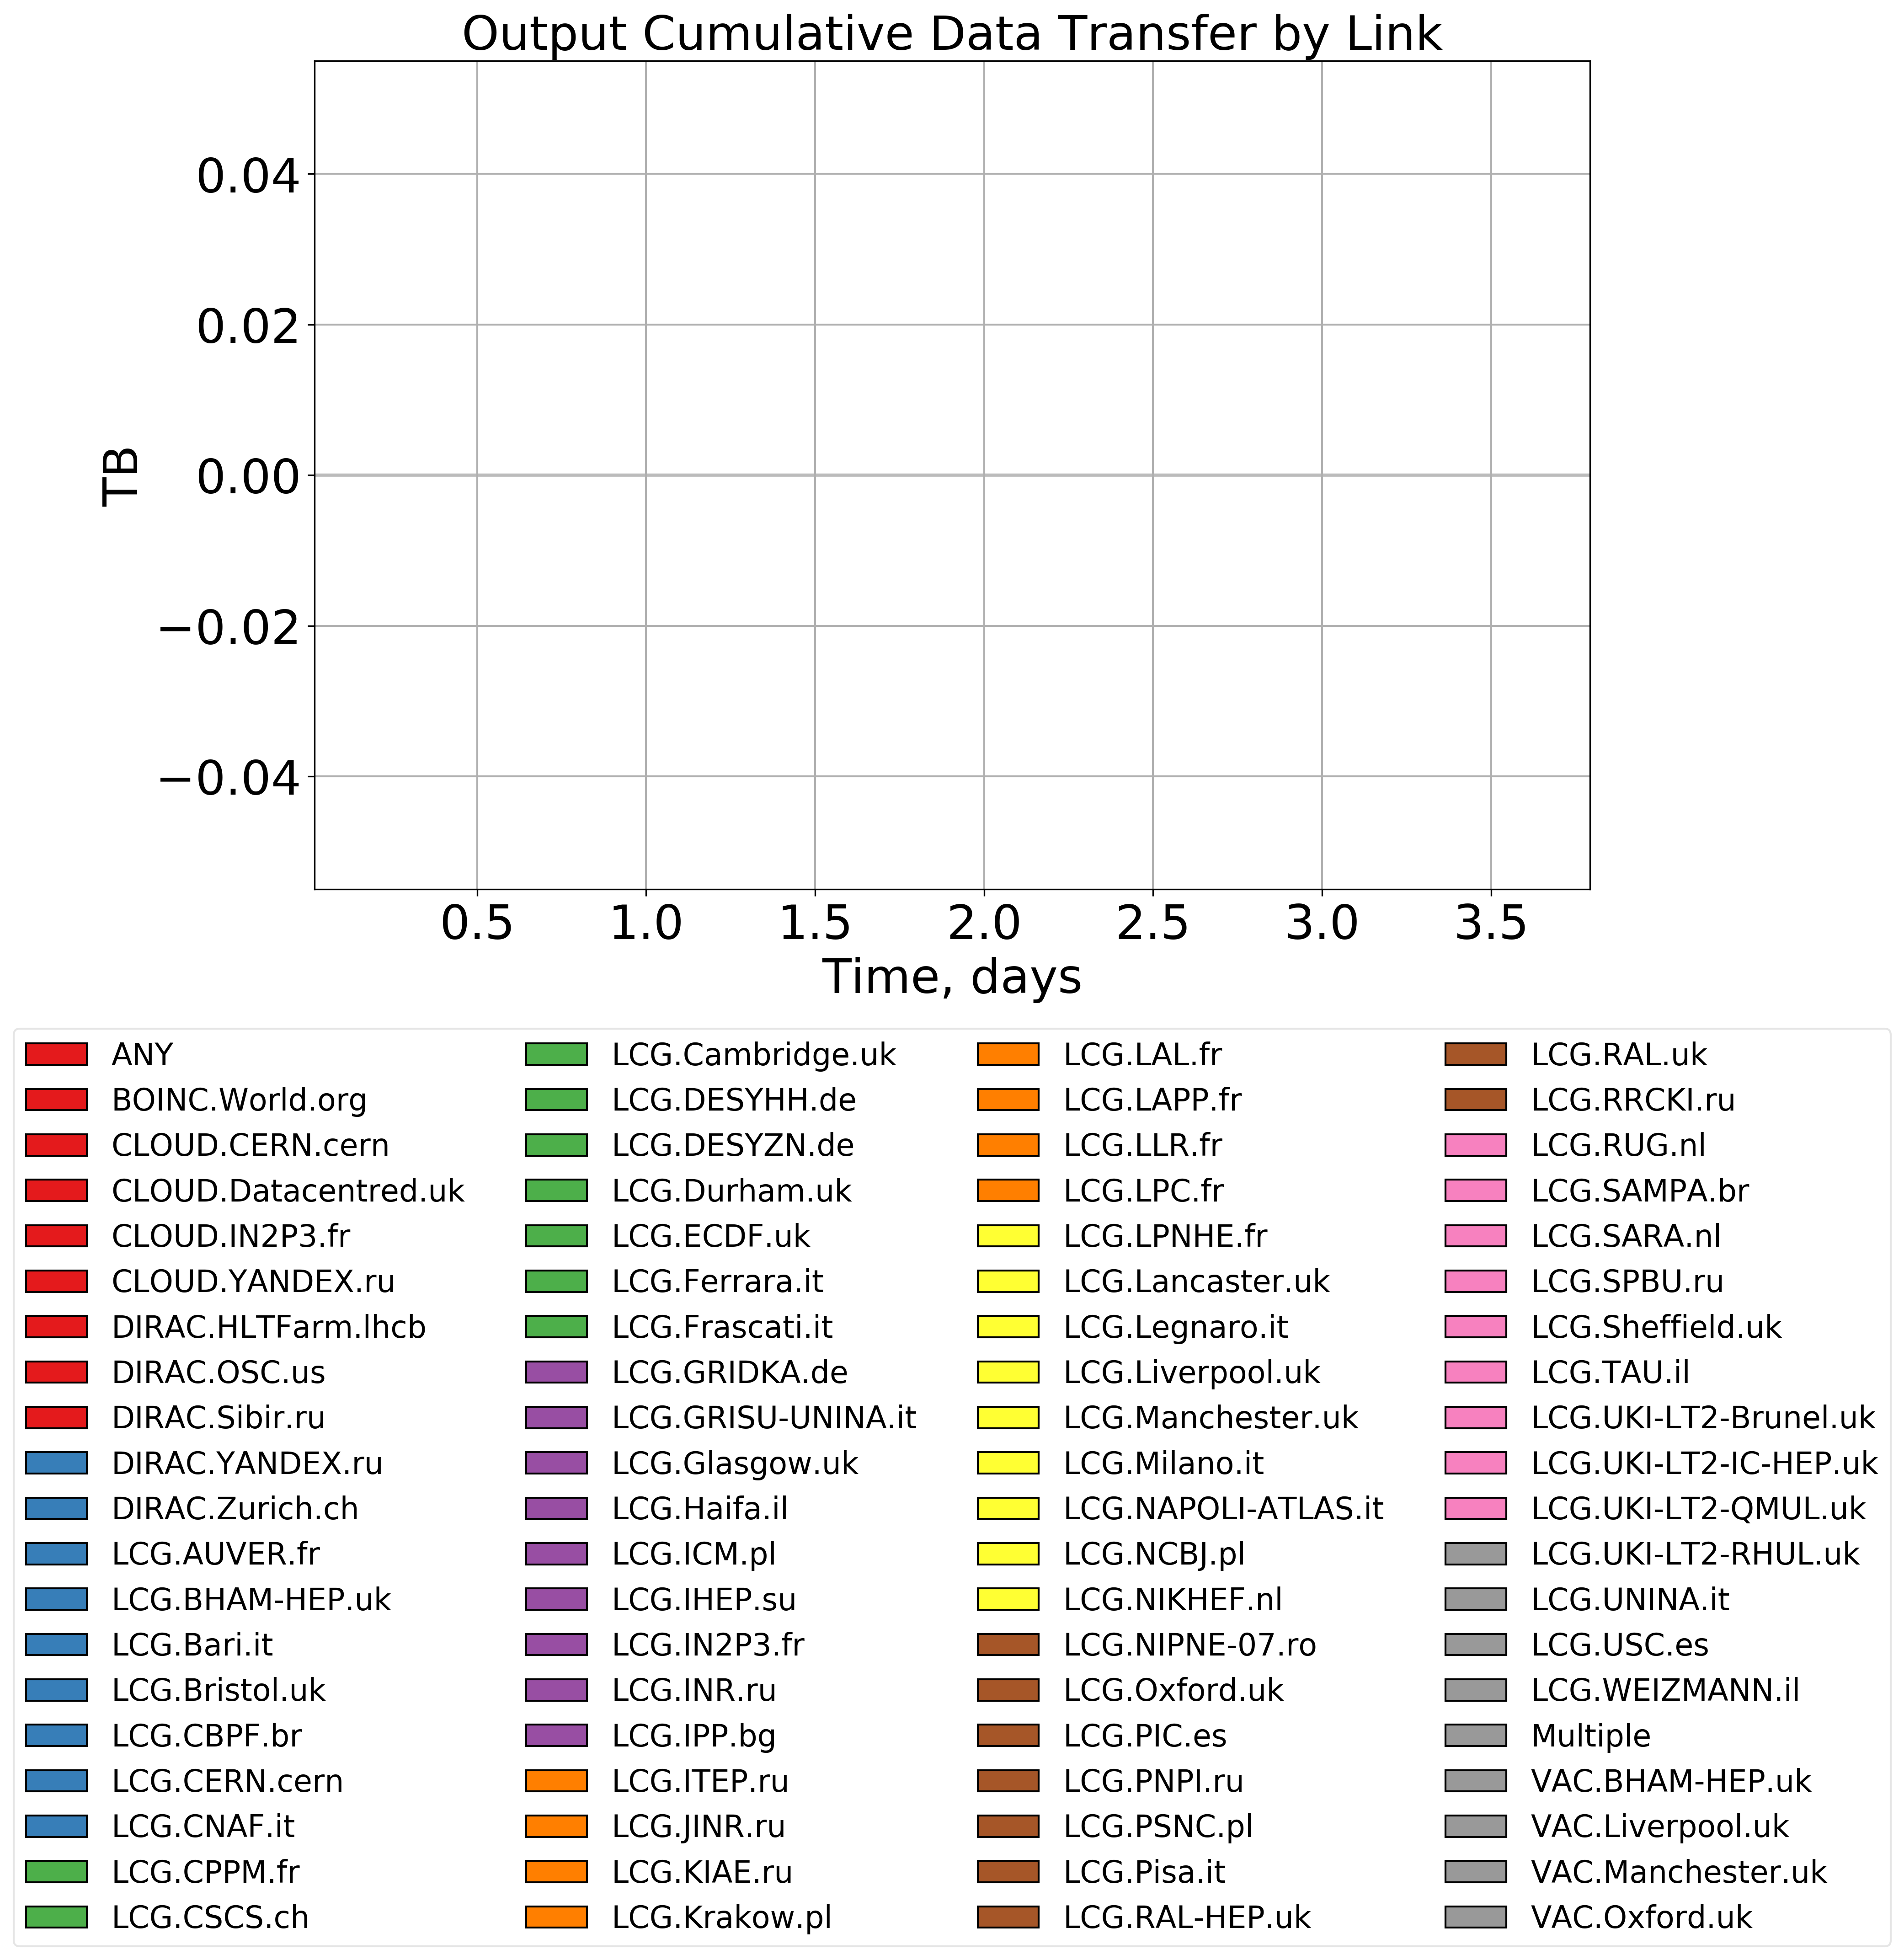

In [27]:
tp.output_cumulative_data_transfer()

# Number of Datasets on Disk/Tape

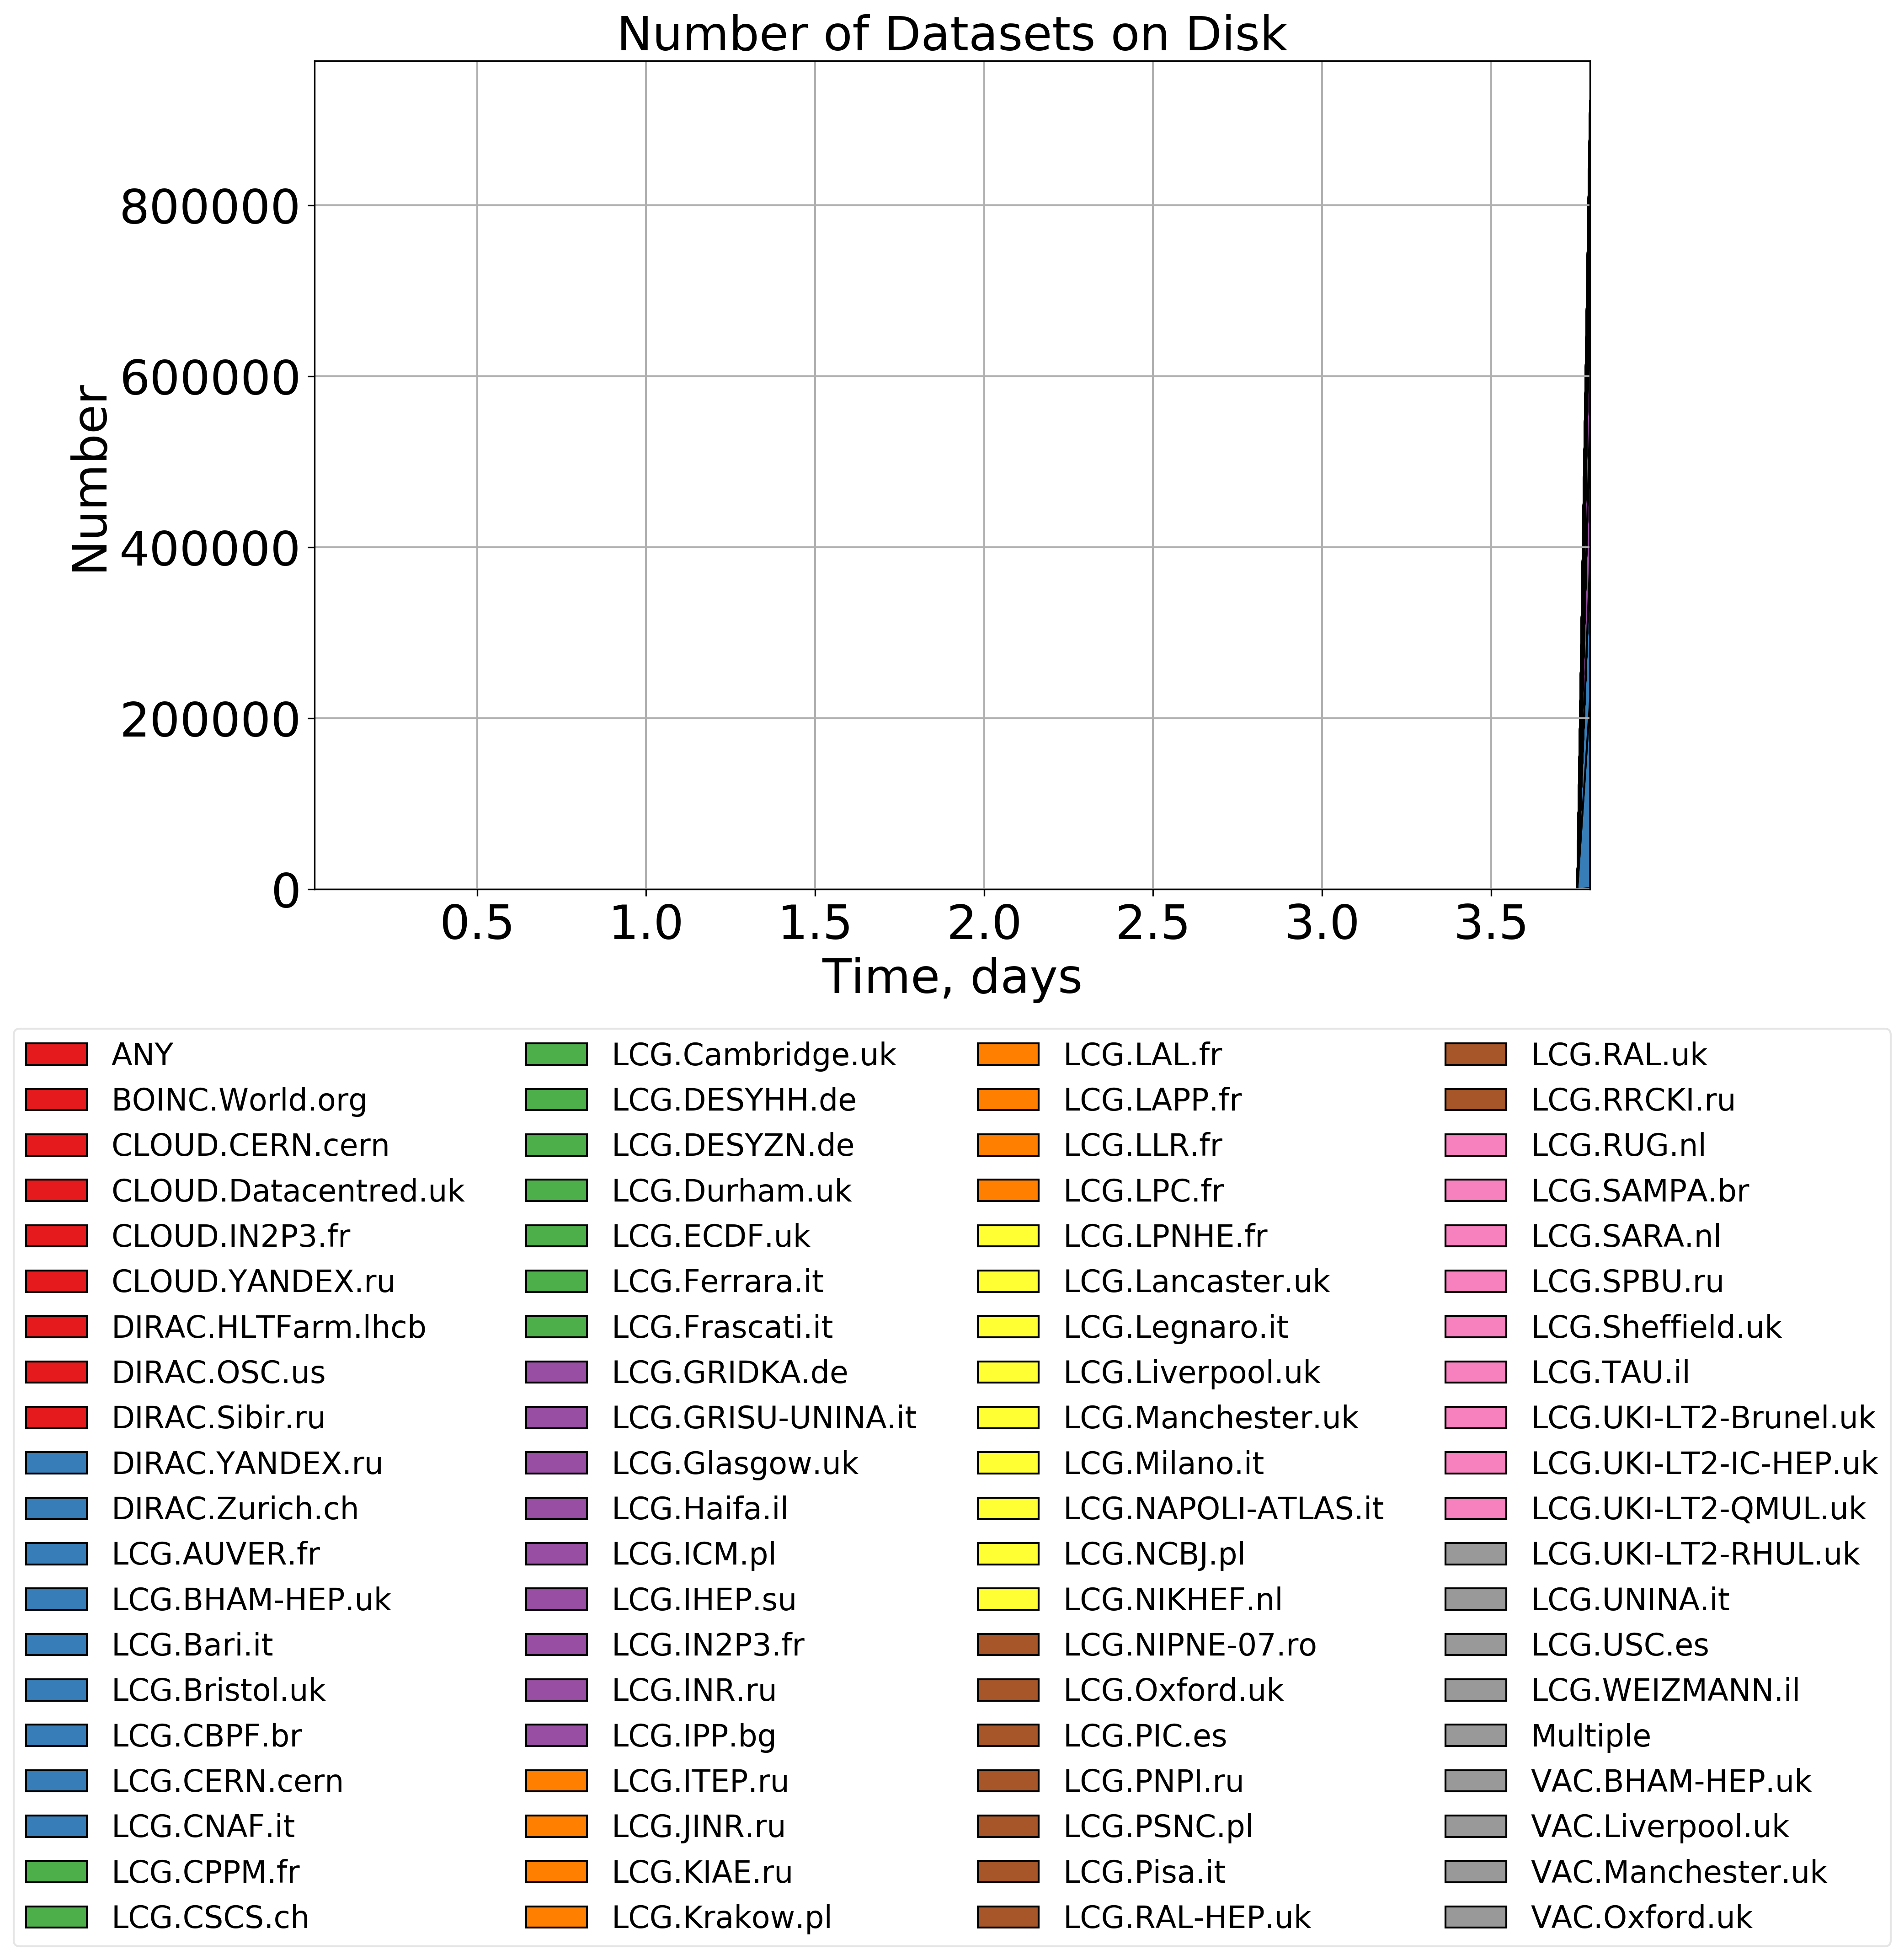

In [28]:
tp.number_of_datasets_ondisk()

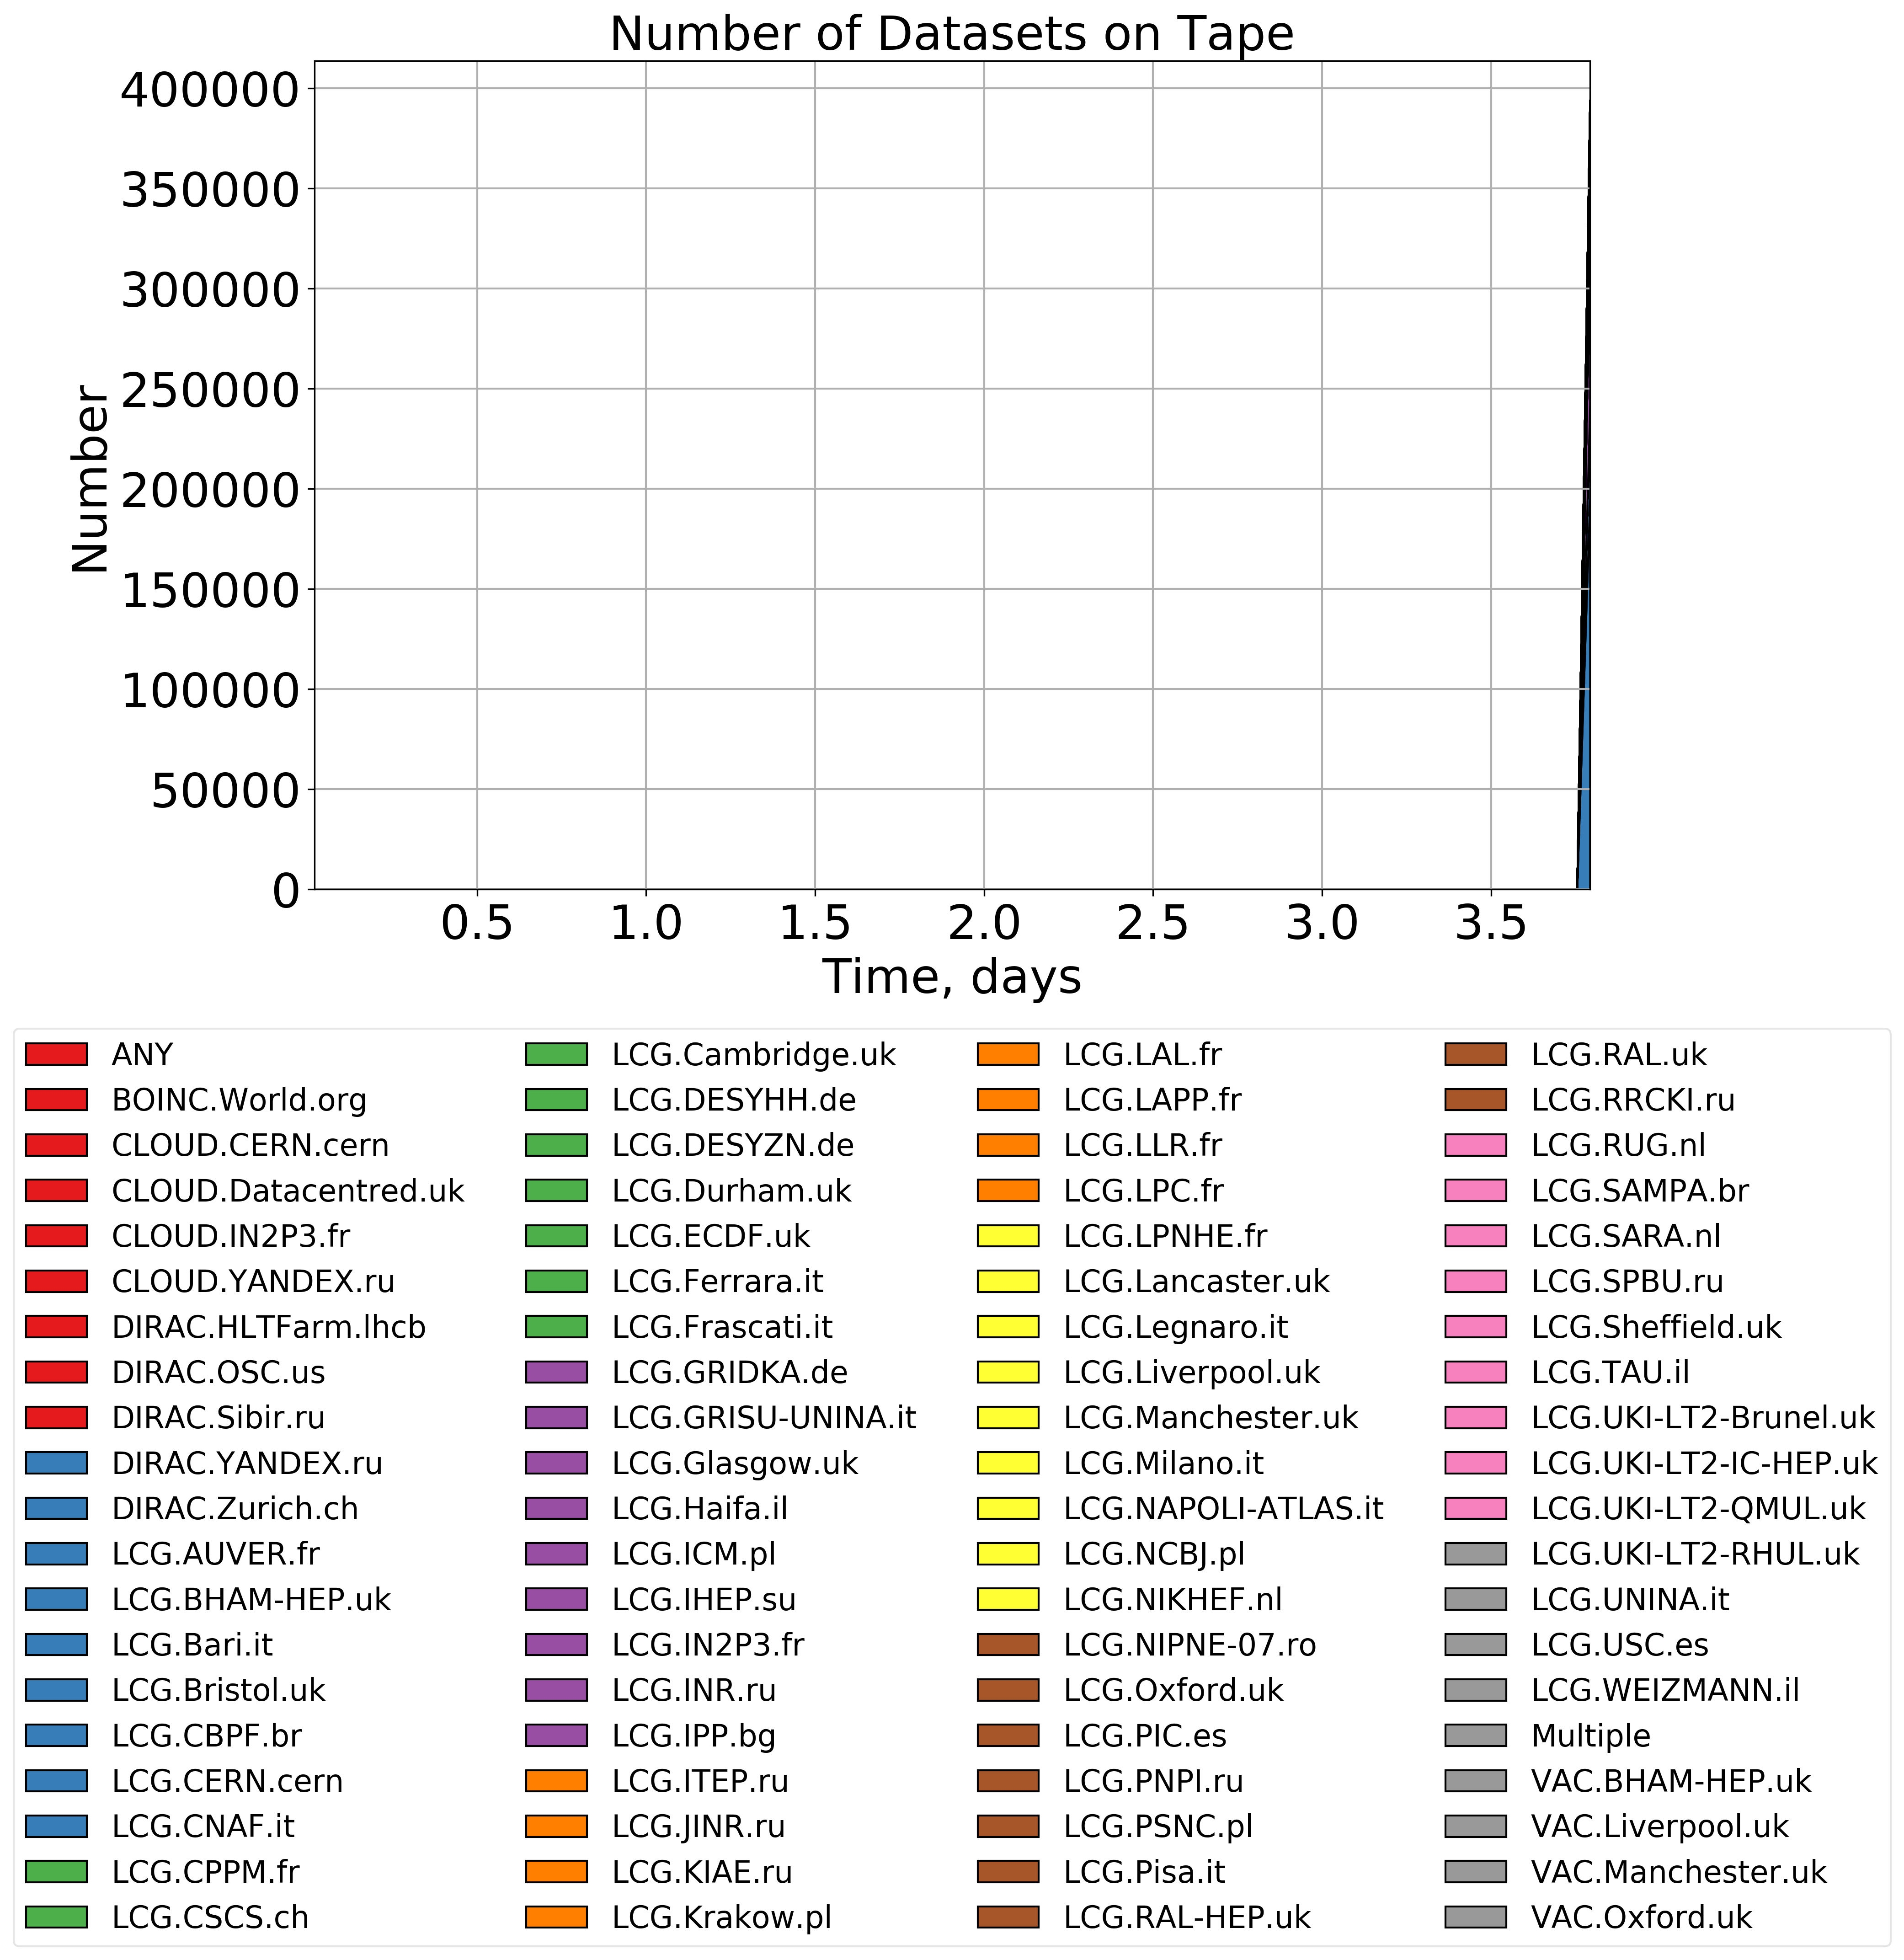

In [29]:
tp.number_of_datasets_ontape()

### Number of Active Cores

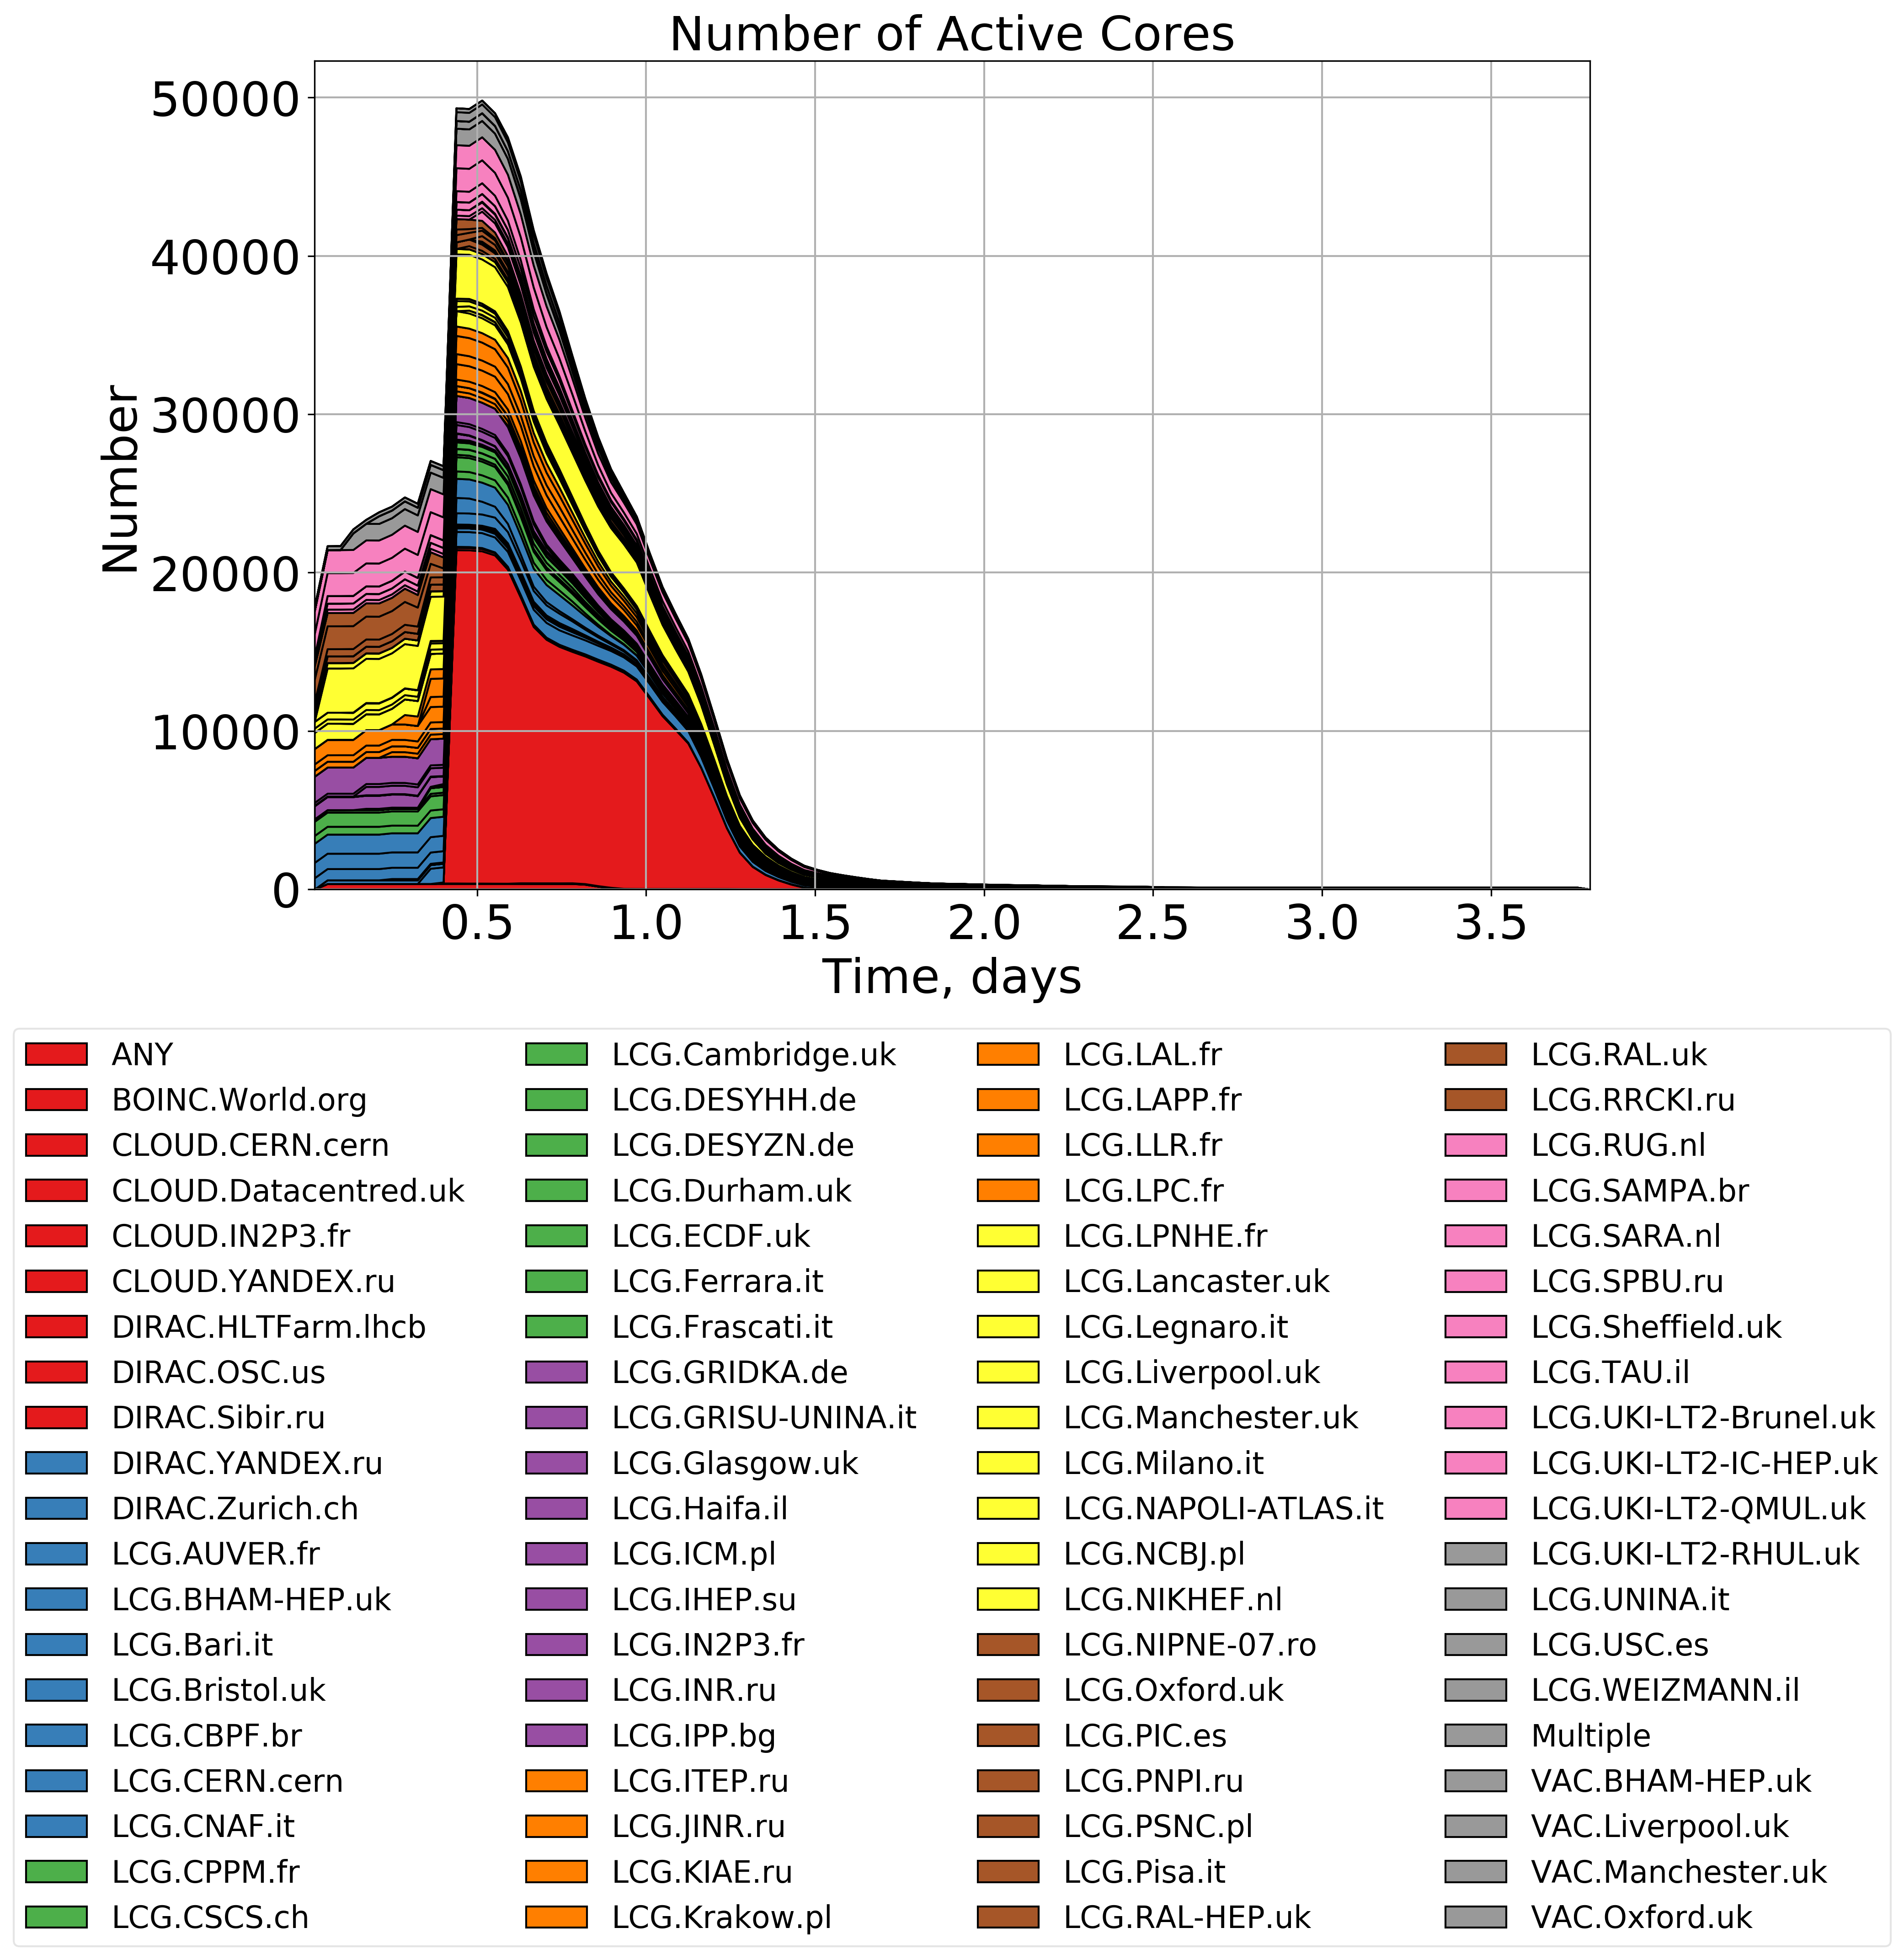

In [30]:
tp.number_of_active_cores()

### Total Data Transfer Plot

In [31]:
tp.total_cumulative_data_transfer()

ValueError: Image size of 3988x81949 pixels is too large. It must be less than 2^16 in each direction.